# Agency vs Communion - corellation analysis (new g_diff)

In [1]:
# general
import pandas as pd
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
from numpy import linalg as LA

# bolukbasi's
import debiaswe as dwe
import debiaswe.we as we
from debiaswe.we import WordEmbedding

# mine
import db_functions as db

### Step 1: Load embeddings

We load all the emdeddings using the same methods and applying the same preprocessing in order to have a common start.

In [2]:
# load FastText's emdeddings
E_ft =  WordEmbedding('../embedding/fast-text/cc.it.300.reduced.vec', 'ft')

*** Reading data from ../embedding/fast-text/cc.it.300.reduced.vec
(477, 300)
477 words of dimension 300 : questo, sua, suo, prima, ..., supportivo, calzolaia, supportiva, agrotecnica
477 words of dimension 300 : questo, sua, suo, prima, ..., supportivo, calzolaia, supportiva, agrotecnica


### Step 2: working whit FastText's embeddings

### Step 2.1: vector difference

In [3]:
# gender direction
g_diff_0 = E_ft.diff('lui', 'lei')
g_diff_1 = E_ft.diff('uomo', 'donna')
g_diff_2 = E_ft.diff('padre', 'madre')
g_diff_3 = E_ft.diff('marito', 'moglie')
g_diff_4 = E_ft.diff('fratello', 'sorella')
g_diff_5 = E_ft.diff('maschio', 'femmina')

#### Step 2.2: PCA

In [4]:
# list of pairs to define gender
gender_pairs = [['lui','lei'],
                ['uomo','donna'], 
                ['padre','madre'],
                ['marito','moglie'],
                ['fratello','sorella'],
                ['maschio','femmina']]

In [5]:
# PCA
pca = we.doPCA(gender_pairs, E_ft)

# PCA components
pc = pca.components_

# singular values
sv = pca.singular_values_

In [6]:
print("Singular values:")
print(sv)

Singular values:
[9.5309240e-01 5.3566736e-01 3.7772956e-01 3.4538972e-01 2.9901835e-01
 2.4023318e-01 5.8411594e-08 4.6098762e-08 4.3273410e-08 4.1712632e-08]


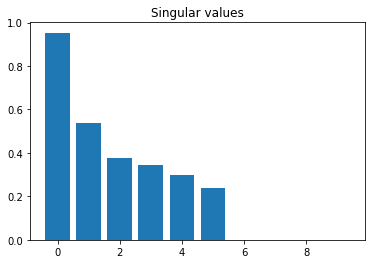

In [7]:
plt.bar(range(pca.n_components_), sv)
plt.title("Singular values")
plt.show()

In [8]:
# gender direction
g_pca_0  = pc[0]/LA.norm(pc[0])

##### All words

In [9]:
# words
ag_com = db.read('ag_com_mf_ita.txt', 'ag-com-mf')

In [10]:
# compute projections
# all words male
proj_ag_com_m_g_diff_0 =  db.prof_proj(E_ft, ag_com, g_diff_0, 'ag-com-m')
proj_ag_com_m_g_diff_1 =  db.prof_proj(E_ft, ag_com, g_diff_1, 'ag-com-m')
proj_ag_com_m_g_diff_2 =  db.prof_proj(E_ft, ag_com, g_diff_2, 'ag-com-m')
proj_ag_com_m_g_diff_3 =  db.prof_proj(E_ft, ag_com, g_diff_3, 'ag-com-m')
proj_ag_com_m_g_diff_4 =  db.prof_proj(E_ft, ag_com, g_diff_4, 'ag-com-m')
proj_ag_com_m_g_diff_5 =  db.prof_proj(E_ft, ag_com, g_diff_5, 'ag-com-m')
proj_ag_com_m_g_pca_0  =  db.prof_proj(E_ft, ag_com, g_pca_0, 'ag-com-m')

# all words female
proj_ag_com_f_g_diff_0 =  db.prof_proj(E_ft, ag_com, g_diff_0, 'ag-com-f')
proj_ag_com_f_g_diff_1 =  db.prof_proj(E_ft, ag_com, g_diff_1, 'ag-com-f')
proj_ag_com_f_g_diff_2 =  db.prof_proj(E_ft, ag_com, g_diff_2, 'ag-com-f')
proj_ag_com_f_g_diff_3 =  db.prof_proj(E_ft, ag_com, g_diff_3, 'ag-com-f')
proj_ag_com_f_g_diff_4 =  db.prof_proj(E_ft, ag_com, g_diff_4, 'ag-com-f')
proj_ag_com_f_g_diff_5 =  db.prof_proj(E_ft, ag_com, g_diff_5, 'ag-com-f')
proj_ag_com_f_g_pca_0  =  db.prof_proj(E_ft, ag_com, g_pca_0, 'ag-com-f')

In [11]:
# print ag_com_m results
ag_com_m_col0 = [] # pandas columns
ag_com_m_col1 = []
ag_com_m_col2 = []
ag_com_m_col3 = []
ag_com_m_col4 = []
ag_com_m_col5 = []
ag_com_m_col6 = []
ag_com_m_col7 = []
ag_com_m_col8 = []
ag_com_m_col9 = []

for i in range(len(proj_ag_com_m_g_diff_0)):
    ag_com_m_col0.append(proj_ag_com_m_g_diff_0[i][0]) # word
    ag_com_m_col1.append(proj_ag_com_m_g_diff_0[i][1]) # projection on g_diff_0
    ag_com_m_col2.append(proj_ag_com_m_g_diff_1[i][1]) # projection on g_diff_1
    ag_com_m_col3.append(proj_ag_com_m_g_diff_2[i][1]) # projection on g_diff_2
    ag_com_m_col4.append(proj_ag_com_m_g_diff_3[i][1]) # projection on g_diff_3
    ag_com_m_col5.append(proj_ag_com_m_g_diff_4[i][1]) # projection on g_diff_4
    ag_com_m_col6.append(proj_ag_com_m_g_diff_5[i][1]) # projection on g_diff_5 
    ag_com_m_col7.append(proj_ag_com_m_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_m_col8.append(proj_ag_com_m_g_diff_0[i][2])
    ag_com_m_col9.append(proj_ag_com_m_g_diff_0[i][3])

ag_com_m_data = {'Word':ag_com_m_col0, 
               'g_diff_0':ag_com_m_col1,
               'g_diff_1':ag_com_m_col2,
               'g_diff_2':ag_com_m_col3,
               'g_diff_3':ag_com_m_col4,
               'g_diff_4':ag_com_m_col5,
               'g_diff_5':ag_com_m_col6,                 
               'g_pca_0':ag_com_m_col7, 
               'Agency':ag_com_m_col8,
               'Communion':ag_com_m_col9}

ag_com_m_table = pd.DataFrame(ag_com_m_data)
ag_com_m_table

,Word,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,Agency,Communion
0,abile,0.080335,0.120490,0.086208,0.004829,0.106689,0.000498,0.102190,2.32,0.66
1,attivo,0.133193,0.168109,0.097818,0.120856,0.192829,0.176144,0.196107,2.35,1.55
2,affettuoso,0.059949,0.134310,0.156923,0.141939,0.150368,0.115129,0.173368,-0.85,1.58
3,altruista,-0.014515,0.042467,-0.000311,0.025308,-0.016769,-0.014150,0.007354,-1.18,2.50
4,ambizioso,0.152494,0.255759,0.246937,0.180257,0.242325,0.174870,0.288911,2.79,-0.97
5,deciso,0.033273,0.053957,0.076919,0.124906,0.034158,0.124417,0.090033,2.88,0.43
6,vanitoso,0.105291,0.171503,0.161655,0.111819,0.169186,0.105787,0.191813,1.29,-1.18
7,capace,0.059239,0.070508,-0.049837,-0.014065,0.015318,-0.012600,0.016343,2.45,1.08
8,confusionario,0.069705,0.169953,0.132182,0.195710,0.182991,0.121639,0.196830,-1.89,-0.95
9,comunicativo,0.085256,0.184973,0.129232,0.132789,0.136623,0.158648,0.186069,1.50,2.00


In [12]:
# ag_com_m pearson correlation
# agency correlation
r_ag_com_m_g_diff_0 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col1)[0]
r_ag_com_m_g_diff_1 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col2)[0]
r_ag_com_m_g_diff_2 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col3)[0]
r_ag_com_m_g_diff_3 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col4)[0]
r_ag_com_m_g_diff_4 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col5)[0]
r_ag_com_m_g_diff_5 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col6)[0]
r_ag_com_m_g_pca_0 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col7)[0]

p_ag_com_m_g_diff_0 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col1)[1]
p_ag_com_m_g_diff_1 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col2)[1]
p_ag_com_m_g_diff_2 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col3)[1]
p_ag_com_m_g_diff_3 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col4)[1]
p_ag_com_m_g_diff_4 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col5)[1]
p_ag_com_m_g_diff_5 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col6)[1]
p_ag_com_m_g_pca_0 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col7)[1]

In [13]:
pearson_data = {'g_diff_0':[r_ag_com_m_g_diff_0,p_ag_com_m_g_diff_0],
                'g_diff_1':[r_ag_com_m_g_diff_1,p_ag_com_m_g_diff_1],
                'g_diff_2':[r_ag_com_m_g_diff_2,p_ag_com_m_g_diff_2],
                'g_diff_3':[r_ag_com_m_g_diff_3,p_ag_com_m_g_diff_3],
                'g_diff_4':[r_ag_com_m_g_diff_4,p_ag_com_m_g_diff_4],
                'g_diff_5':[r_ag_com_m_g_diff_5,p_ag_com_m_g_diff_5],
                'g_pca_0':[r_ag_com_m_g_pca_0,p_ag_com_m_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency male correlation")
pearson_table

Agency male correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.203419,-0.000718,0.007317,-0.077207,0.005053,-0.048165,0.006002
p,0.115864,0.995618,0.955371,0.554243,0.969168,0.712419,0.963385


In [14]:
# ag_com_m pearson correlation
# communion correlation
r_ag_com_m_g_diff_0 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col1)[0]
r_ag_com_m_g_diff_1 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col2)[0]
r_ag_com_m_g_diff_2 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col3)[0]
r_ag_com_m_g_diff_3 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col4)[0]
r_ag_com_m_g_diff_4 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col5)[0]
r_ag_com_m_g_diff_5 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col6)[0]
r_ag_com_m_g_pca_0 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col7)[0]

p_ag_com_m_g_diff_0 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col1)[1]
p_ag_com_m_g_diff_1 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col2)[1]
p_ag_com_m_g_diff_2 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col3)[1]
p_ag_com_m_g_diff_3 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col4)[1]
p_ag_com_m_g_diff_4 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col5)[1]
p_ag_com_m_g_diff_5 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col6)[1]
p_ag_com_m_g_pca_0 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col7)[1]

In [15]:
pearson_data = {'g_diff_0':[r_ag_com_m_g_diff_0,p_ag_com_m_g_diff_0],
                'g_diff_1':[r_ag_com_m_g_diff_1,p_ag_com_m_g_diff_1],
                'g_diff_2':[r_ag_com_m_g_diff_2,p_ag_com_m_g_diff_2],
                'g_diff_3':[r_ag_com_m_g_diff_3,p_ag_com_m_g_diff_3],
                'g_diff_4':[r_ag_com_m_g_diff_4,p_ag_com_m_g_diff_4],
                'g_diff_5':[r_ag_com_m_g_diff_5,p_ag_com_m_g_diff_5],
                'g_pca_0':[r_ag_com_m_g_pca_0,p_ag_com_m_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion male correlation")
pearson_table

Communion male correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,-0.247770,-0.081372,-0.179115,-0.170462,-0.193613,-0.257977,-0.191931
p,0.054198,0.533009,0.167221,0.189033,0.134897,0.044718,0.138385


In [16]:
# print ag_com_f results
ag_com_f_col0 = [] # pandas columns
ag_com_f_col1 = []
ag_com_f_col2 = []
ag_com_f_col3 = []
ag_com_f_col4 = []
ag_com_f_col5 = []
ag_com_f_col6 = []
ag_com_f_col7 = []
ag_com_f_col8 = []
ag_com_f_col9 = []

for i in range(len(proj_ag_com_f_g_diff_0)):
    ag_com_f_col0.append(proj_ag_com_f_g_diff_0[i][0]) # word
    ag_com_f_col1.append(proj_ag_com_f_g_diff_0[i][1]) # projection on g_diff_0
    ag_com_f_col2.append(proj_ag_com_f_g_diff_1[i][1]) # projection on g_diff_1
    ag_com_f_col3.append(proj_ag_com_f_g_diff_2[i][1]) # projection on g_diff_2
    ag_com_f_col4.append(proj_ag_com_f_g_diff_3[i][1]) # projection on g_diff_3
    ag_com_f_col5.append(proj_ag_com_f_g_diff_4[i][1]) # projection on g_diff_4
    ag_com_f_col6.append(proj_ag_com_f_g_diff_5[i][1]) # projection on g_diff_5 
    ag_com_f_col7.append(proj_ag_com_f_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_f_col8.append(proj_ag_com_f_g_diff_0[i][2])
    ag_com_f_col9.append(proj_ag_com_f_g_diff_0[i][3])

ag_com_f_data = {'Word':ag_com_f_col0, 
               'g_diff_0':ag_com_f_col1,
               'g_diff_1':ag_com_f_col2,
               'g_diff_2':ag_com_f_col3,
               'g_diff_3':ag_com_f_col4,
               'g_diff_4':ag_com_f_col5,
               'g_diff_5':ag_com_f_col6,                 
               'g_pca_0':ag_com_f_col7, 
               'Agency':ag_com_f_col8,
               'Communion':ag_com_f_col9}

ag_com_f_table = pd.DataFrame(ag_com_f_data)
ag_com_f_table

,Word,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,Agency,Communion
0,abile,0.080335,0.120490,0.086208,0.004829,0.106689,0.000498,0.102190,2.32,0.66
1,attiva,-0.064096,-0.151502,-0.173983,-0.066593,-0.120439,-0.142268,-0.168159,2.35,1.55
2,affettuosa,-0.090580,-0.146810,-0.164617,-0.124567,-0.191728,-0.231713,-0.210513,-0.85,1.58
3,altruista,-0.014515,0.042467,-0.000311,0.025308,-0.016769,-0.014150,0.007354,-1.18,2.50
4,ambiziosa,-0.092678,-0.152887,-0.129853,-0.106662,-0.173629,-0.192398,-0.189249,2.79,-0.97
5,decisa,-0.067846,-0.161840,-0.061119,-0.039100,-0.167151,-0.102597,-0.143159,2.88,0.43
6,vanitosa,-0.198017,-0.230053,-0.173575,-0.048352,-0.237027,-0.196452,-0.249589,1.29,-1.18
7,capace,0.059239,0.070508,-0.049837,-0.014065,0.015318,-0.012600,0.016343,2.45,1.08
8,confusionaria,-0.055924,-0.137963,-0.114462,-0.012007,-0.120199,-0.233467,-0.151937,-1.89,-0.95
9,comunicativa,-0.036487,-0.093914,-0.130035,-0.093396,-0.093884,-0.147461,-0.132258,1.50,2.00


In [17]:
# ag_com_f pearson correlation
# agency correlation
r_ag_com_f_g_diff_0 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col1)[0]
r_ag_com_f_g_diff_1 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col2)[0]
r_ag_com_f_g_diff_2 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col3)[0]
r_ag_com_f_g_diff_3 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col4)[0]
r_ag_com_f_g_diff_4 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col5)[0]
r_ag_com_f_g_diff_5 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col6)[0]
r_ag_com_f_g_pca_0 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col7)[0]

p_ag_com_f_g_diff_0 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col1)[1]
p_ag_com_f_g_diff_1 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col2)[1]
p_ag_com_f_g_diff_2 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col3)[1]
p_ag_com_f_g_diff_3 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col4)[1]
p_ag_com_f_g_diff_4 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col5)[1]
p_ag_com_f_g_diff_5 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col6)[1]
p_ag_com_f_g_pca_0 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col7)[1]

In [18]:
pearson_data = {'g_diff_0':[r_ag_com_f_g_diff_0,p_ag_com_f_g_diff_0],
                'g_diff_1':[r_ag_com_f_g_diff_1,p_ag_com_f_g_diff_1],
                'g_diff_2':[r_ag_com_f_g_diff_2,p_ag_com_f_g_diff_2],
                'g_diff_3':[r_ag_com_f_g_diff_3,p_ag_com_f_g_diff_3],
                'g_diff_4':[r_ag_com_f_g_diff_4,p_ag_com_f_g_diff_4],
                'g_diff_5':[r_ag_com_f_g_diff_5,p_ag_com_f_g_diff_5],
                'g_pca_0':[r_ag_com_f_g_pca_0,p_ag_com_f_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency female correlation")
pearson_table

Agency female correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.234394,0.089068,0.137183,-0.031967,0.098132,0.096044,0.116392
p,0.069030,0.494852,0.291764,0.806790,0.451814,0.461541,0.371703


In [19]:
# ag_com_f pearson correlation
# communion correlation
r_ag_com_f_g_diff_0 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col1)[0]
r_ag_com_f_g_diff_1 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col2)[0]
r_ag_com_f_g_diff_2 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col3)[0]
r_ag_com_f_g_diff_3 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col4)[0]
r_ag_com_f_g_diff_4 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col5)[0]
r_ag_com_f_g_diff_5 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col6)[0]
r_ag_com_f_g_pca_0 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col7)[0]

p_ag_com_f_g_diff_0 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col1)[1]
p_ag_com_f_g_diff_1 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col2)[1]
p_ag_com_f_g_diff_2 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col3)[1]
p_ag_com_f_g_diff_3 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col4)[1]
p_ag_com_f_g_diff_4 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col5)[1]
p_ag_com_f_g_diff_5 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col6)[1]
p_ag_com_f_g_pca_0 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col7)[1]

In [20]:
pearson_data = {'g_diff_0':[r_ag_com_f_g_diff_0,p_ag_com_f_g_diff_0],
                'g_diff_1':[r_ag_com_f_g_diff_1,p_ag_com_f_g_diff_1],
                'g_diff_2':[r_ag_com_f_g_diff_2,p_ag_com_f_g_diff_2],
                'g_diff_3':[r_ag_com_f_g_diff_3,p_ag_com_f_g_diff_3],
                'g_diff_4':[r_ag_com_f_g_diff_4,p_ag_com_f_g_diff_4],
                'g_diff_5':[r_ag_com_f_g_diff_5,p_ag_com_f_g_diff_5],
                'g_pca_0':[r_ag_com_f_g_pca_0,p_ag_com_f_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion female correlation")
pearson_table

Communion female correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.155887,0.271003,0.214783,0.105173,0.253269,0.135282,0.232685
p,0.230265,0.034641,0.096460,0.419853,0.048906,0.298564,0.071139


##### Ungendered words

In [21]:
# words
ag_com_ung = db.read('ag_com_ung_ita.txt', 'ag-com-mf')

In [22]:
# compute projections
# all words ungendered
proj_ag_com_ung_g_diff_0 =  db.prof_proj(E_ft, ag_com_ung, g_diff_0, 'ag-com-m')
proj_ag_com_ung_g_diff_1 =  db.prof_proj(E_ft, ag_com_ung, g_diff_1, 'ag-com-m')
proj_ag_com_ung_g_diff_2 =  db.prof_proj(E_ft, ag_com_ung, g_diff_2, 'ag-com-m')
proj_ag_com_ung_g_diff_3 =  db.prof_proj(E_ft, ag_com_ung, g_diff_3, 'ag-com-m')
proj_ag_com_ung_g_diff_4 =  db.prof_proj(E_ft, ag_com_ung, g_diff_4, 'ag-com-m')
proj_ag_com_ung_g_diff_5 =  db.prof_proj(E_ft, ag_com_ung, g_diff_5, 'ag-com-m')
proj_ag_com_ung_g_pca_0  =  db.prof_proj(E_ft, ag_com_ung, g_pca_0, 'ag-com-m')

In [23]:
# print ag_com_ung results
ag_com_ung_col0 = [] # pandas columns
ag_com_ung_col1 = []
ag_com_ung_col2 = []
ag_com_ung_col3 = []
ag_com_ung_col4 = []
ag_com_ung_col5 = []
ag_com_ung_col6 = []
ag_com_ung_col7 = []
ag_com_ung_col8 = []
ag_com_ung_col9 = []

for i in range(len(proj_ag_com_ung_g_diff_0)):
    ag_com_ung_col0.append(proj_ag_com_ung_g_diff_0[i][0]) # word
    ag_com_ung_col1.append(proj_ag_com_ung_g_diff_0[i][1]) # projection on g_diff_0
    ag_com_ung_col2.append(proj_ag_com_ung_g_diff_1[i][1]) # projection on g_diff_1
    ag_com_ung_col3.append(proj_ag_com_ung_g_diff_2[i][1]) # projection on g_diff_2
    ag_com_ung_col4.append(proj_ag_com_ung_g_diff_3[i][1]) # projection on g_diff_3
    ag_com_ung_col5.append(proj_ag_com_ung_g_diff_4[i][1]) # projection on g_diff_4
    ag_com_ung_col6.append(proj_ag_com_ung_g_diff_5[i][1]) # projection on g_diff_5 
    ag_com_ung_col7.append(proj_ag_com_ung_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_ung_col8.append(proj_ag_com_ung_g_diff_0[i][2])
    ag_com_ung_col9.append(proj_ag_com_ung_g_diff_0[i][3])

ag_com_ung_data = {'Word':ag_com_ung_col0, 
               'g_diff_0':ag_com_ung_col1,
               'g_diff_1':ag_com_ung_col2,
               'g_diff_2':ag_com_ung_col3,
               'g_diff_3':ag_com_ung_col4,
               'g_diff_4':ag_com_ung_col5,
               'g_diff_5':ag_com_ung_col6,                 
               'g_pca_0':ag_com_ung_col7, 
               'Agency':ag_com_ung_col8,
               'Communion':ag_com_ung_col9}

ag_com_ung_table = pd.DataFrame(ag_com_ung_data)
ag_com_ung_table

,Word,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,Agency,Communion
0,abile,0.080335,0.120490,0.086208,0.004829,0.106689,0.000498,0.102190,2.32,0.66
1,altruista,-0.014515,0.042467,-0.000311,0.025308,-0.016769,-0.014150,0.007354,-1.18,2.50
2,capace,0.059239,0.070508,-0.049837,-0.014065,0.015318,-0.012600,0.016343,2.45,1.08
3,competente,0.001019,0.002867,-0.004496,0.020771,-0.012363,0.012025,0.001375,2.21,0.61
4,coerente,0.008640,0.041293,-0.001609,0.019917,0.028906,0.029341,0.028646,0.74,1.68
5,dominante,-0.003824,-0.034164,-0.036452,-0.025659,-0.036002,0.053081,-0.026552,2.76,-1.89
6,amichevole,0.105541,0.063650,-0.061761,-0.092143,-0.004654,-0.094480,-0.011900,0.15,2.23
7,disponibile,-0.029067,0.004168,-0.069041,0.015819,-0.023536,-0.066727,-0.036633,-0.42,2.76
8,egoista,0.019207,0.113677,0.023030,0.069736,0.038486,0.030308,0.068976,1.53,-2.50
9,indipendente,0.030305,-0.018292,-0.110225,-0.003638,0.009159,-0.027941,-0.033587,2.65,-0.83


In [24]:
# ag_com_ung pearson correlation
# agency correlation
r_ag_com_ung_g_diff_0 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col1)[0]
r_ag_com_ung_g_diff_1 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col2)[0]
r_ag_com_ung_g_diff_2 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col3)[0]
r_ag_com_ung_g_diff_3 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col4)[0]
r_ag_com_ung_g_diff_4 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col5)[0]
r_ag_com_ung_g_diff_5 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col6)[0]
r_ag_com_ung_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col7)[0]

p_ag_com_ung_g_diff_0 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col1)[1]
p_ag_com_ung_g_diff_1 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col2)[1]
p_ag_com_ung_g_diff_2 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col3)[1]
p_ag_com_ung_g_diff_3 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col4)[1]
p_ag_com_ung_g_diff_4 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col5)[1]
p_ag_com_ung_g_diff_5 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col6)[1]
p_ag_com_ung_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col7)[1]

In [25]:
pearson_data = {'g_diff_0':[r_ag_com_ung_g_diff_0,p_ag_com_ung_g_diff_0],
                'g_diff_1':[r_ag_com_ung_g_diff_1,p_ag_com_ung_g_diff_1],
                'g_diff_2':[r_ag_com_ung_g_diff_2,p_ag_com_ung_g_diff_2],
                'g_diff_3':[r_ag_com_ung_g_diff_3,p_ag_com_ung_g_diff_3],
                'g_diff_4':[r_ag_com_ung_g_diff_4,p_ag_com_ung_g_diff_4],
                'g_diff_5':[r_ag_com_ung_g_diff_5,p_ag_com_ung_g_diff_5],
                'g_pca_0':[r_ag_com_ung_g_pca_0,p_ag_com_ung_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency ungendered correlation")
pearson_table

Agency ungendered correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.452508,0.167660,0.082439,0.057046,0.20487,0.145795,0.233299
p,0.039427,0.467573,0.722397,0.805983,0.37301,0.528308,0.308784


In [26]:
# ag_com_ung pearson correlation
# communion correlation
r_ag_com_ung_g_diff_0 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col1)[0]
r_ag_com_ung_g_diff_1 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col2)[0]
r_ag_com_ung_g_diff_2 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col3)[0]
r_ag_com_ung_g_diff_3 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col4)[0]
r_ag_com_ung_g_diff_4 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col5)[0]
r_ag_com_ung_g_diff_5 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col6)[0]
r_ag_com_ung_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col7)[0]

p_ag_com_ung_g_diff_0 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col1)[1]
p_ag_com_ung_g_diff_1 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col2)[1]
p_ag_com_ung_g_diff_2 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col3)[1]
p_ag_com_ung_g_diff_3 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col4)[1]
p_ag_com_ung_g_diff_4 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col5)[1]
p_ag_com_ung_g_diff_5 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col6)[1]
p_ag_com_ung_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col7)[1]

In [27]:
pearson_data = {'g_diff_0':[r_ag_com_ung_g_diff_0,p_ag_com_ung_g_diff_0],
                'g_diff_1':[r_ag_com_ung_g_diff_1,p_ag_com_ung_g_diff_1],
                'g_diff_2':[r_ag_com_ung_g_diff_2,p_ag_com_ung_g_diff_2],
                'g_diff_3':[r_ag_com_ung_g_diff_3,p_ag_com_ung_g_diff_3],
                'g_diff_4':[r_ag_com_ung_g_diff_4,p_ag_com_ung_g_diff_4],
                'g_diff_5':[r_ag_com_ung_g_diff_5,p_ag_com_ung_g_diff_5],
                'g_pca_0':[r_ag_com_ung_g_pca_0,p_ag_com_ung_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion ungendered correlation")
pearson_table

Communion ungendered correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.001922,0.135117,0.117081,-0.058880,0.034705,-0.369252,0.022898
p,0.993402,0.559248,0.613263,0.799865,0.881283,0.099491,0.921519


##### Gendered words

In [28]:
# words
ag_com_gen = db.read('ag_com_gen_ita.txt', 'ag-com-mf')

In [29]:
# compute projections
# male
proj_ag_com_gen_m_g_diff_0 =  db.prof_proj(E_ft, ag_com_gen, g_diff_0, 'ag-com-m')
proj_ag_com_gen_m_g_diff_1 =  db.prof_proj(E_ft, ag_com_gen, g_diff_1, 'ag-com-m')
proj_ag_com_gen_m_g_diff_2 =  db.prof_proj(E_ft, ag_com_gen, g_diff_2, 'ag-com-m')
proj_ag_com_gen_m_g_diff_3 =  db.prof_proj(E_ft, ag_com_gen, g_diff_3, 'ag-com-m')
proj_ag_com_gen_m_g_diff_4 =  db.prof_proj(E_ft, ag_com_gen, g_diff_4, 'ag-com-m')
proj_ag_com_gen_m_g_diff_5 =  db.prof_proj(E_ft, ag_com_gen, g_diff_5, 'ag-com-m')
proj_ag_com_gen_m_g_pca_0  =  db.prof_proj(E_ft, ag_com_gen, g_pca_0, 'ag-com-m')

# female
proj_ag_com_gen_f_g_diff_0 =  db.prof_proj(E_ft, ag_com_gen, g_diff_0, 'ag-com-f')
proj_ag_com_gen_f_g_diff_1 =  db.prof_proj(E_ft, ag_com_gen, g_diff_1, 'ag-com-f')
proj_ag_com_gen_f_g_diff_2 =  db.prof_proj(E_ft, ag_com_gen, g_diff_2, 'ag-com-f')
proj_ag_com_gen_f_g_diff_3 =  db.prof_proj(E_ft, ag_com_gen, g_diff_3, 'ag-com-f')
proj_ag_com_gen_f_g_diff_4 =  db.prof_proj(E_ft, ag_com_gen, g_diff_4, 'ag-com-f')
proj_ag_com_gen_f_g_diff_5 =  db.prof_proj(E_ft, ag_com_gen, g_diff_5, 'ag-com-f')
proj_ag_com_gen_f_g_pca_0  =  db.prof_proj(E_ft, ag_com_gen, g_pca_0, 'ag-com-f')

In [30]:
# print ag_com_gen_m results
ag_com_gen_m_col0 = [] # pandas columns
ag_com_gen_m_col1 = []
ag_com_gen_m_col2 = []
ag_com_gen_m_col3 = []
ag_com_gen_m_col4 = []
ag_com_gen_m_col5 = []
ag_com_gen_m_col6 = []
ag_com_gen_m_col7 = []
ag_com_gen_m_col8 = []
ag_com_gen_m_col9 = []

for i in range(len(proj_ag_com_gen_m_g_diff_0)):
    ag_com_gen_m_col0.append(proj_ag_com_gen_m_g_diff_0[i][0]) # word
    ag_com_gen_m_col1.append(proj_ag_com_gen_m_g_diff_0[i][1]) # projection on g_diff_0
    ag_com_gen_m_col2.append(proj_ag_com_gen_m_g_diff_1[i][1]) # projection on g_diff_1
    ag_com_gen_m_col3.append(proj_ag_com_gen_m_g_diff_2[i][1]) # projection on g_diff_2
    ag_com_gen_m_col4.append(proj_ag_com_gen_m_g_diff_3[i][1]) # projection on g_diff_3
    ag_com_gen_m_col5.append(proj_ag_com_gen_m_g_diff_4[i][1]) # projection on g_diff_4
    ag_com_gen_m_col6.append(proj_ag_com_gen_m_g_diff_5[i][1]) # projection on g_diff_5 
    ag_com_gen_m_col7.append(proj_ag_com_gen_m_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_gen_m_col8.append(proj_ag_com_gen_m_g_diff_0[i][2])
    ag_com_gen_m_col9.append(proj_ag_com_gen_m_g_diff_0[i][3])

ag_com_gen_m_data = {'Word':ag_com_gen_m_col0, 
               'g_diff_0':ag_com_gen_m_col1,
               'g_diff_1':ag_com_gen_m_col2,
               'g_diff_2':ag_com_gen_m_col3,
               'g_diff_3':ag_com_gen_m_col4,
               'g_diff_4':ag_com_gen_m_col5,
               'g_diff_5':ag_com_gen_m_col6,                 
               'g_pca_0':ag_com_gen_m_col7, 
               'Agency':ag_com_gen_m_col8,
               'Communion':ag_com_gen_m_col9}

ag_com_gen_m_table = pd.DataFrame(ag_com_gen_m_data)
ag_com_gen_m_table

,Word,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,Agency,Communion
0,attivo,0.133193,0.168109,0.097818,0.120856,0.192829,0.176144,0.196107,2.35,1.55
1,affettuoso,0.059949,0.134310,0.156923,0.141939,0.150368,0.115129,0.173368,-0.85,1.58
2,ambizioso,0.152494,0.255759,0.246937,0.180257,0.242325,0.174870,0.288911,2.79,-0.97
3,deciso,0.033273,0.053957,0.076919,0.124906,0.034158,0.124417,0.090033,2.88,0.43
4,vanitoso,0.105291,0.171503,0.161655,0.111819,0.169186,0.105787,0.191813,1.29,-1.18
5,confusionario,0.069705,0.169953,0.132182,0.195710,0.182991,0.121639,0.196830,-1.89,-0.95
6,comunicativo,0.085256,0.184973,0.129232,0.132789,0.136623,0.158648,0.186069,1.50,2.00
7,competitivo,0.072216,0.116152,0.091410,0.089170,0.131161,0.215743,0.153743,2.71,-1.39
8,presuntuoso,0.112785,0.214461,0.196778,0.144952,0.174026,0.160649,0.230236,1.53,-1.50
9,coscienzioso,0.080623,0.217547,0.200982,0.186322,0.156652,0.193452,0.233943,0.58,1.32


In [31]:
# ag_com_gen_m pearson correlation
# agency correlation
r_ag_com_gen_m_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col1)[0]
r_ag_com_gen_m_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col2)[0]
r_ag_com_gen_m_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col3)[0]
r_ag_com_gen_m_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col4)[0]
r_ag_com_gen_m_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col5)[0]
r_ag_com_gen_m_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col6)[0]
r_ag_com_gen_m_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col7)[0]

p_ag_com_gen_m_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col1)[1]
p_ag_com_gen_m_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col2)[1]
p_ag_com_gen_m_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col3)[1]
p_ag_com_gen_m_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col4)[1]
p_ag_com_gen_m_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col5)[1]
p_ag_com_gen_m_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col6)[1]
p_ag_com_gen_m_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col7)[1]

In [32]:
pearson_data = {'g_diff_0':[r_ag_com_gen_m_g_diff_0,p_ag_com_gen_m_g_diff_0],
                'g_diff_1':[r_ag_com_gen_m_g_diff_1,p_ag_com_gen_m_g_diff_1],
                'g_diff_2':[r_ag_com_gen_m_g_diff_2,p_ag_com_gen_m_g_diff_2],
                'g_diff_3':[r_ag_com_gen_m_g_diff_3,p_ag_com_gen_m_g_diff_3],
                'g_diff_4':[r_ag_com_gen_m_g_diff_4,p_ag_com_gen_m_g_diff_4],
                'g_diff_5':[r_ag_com_gen_m_g_diff_5,p_ag_com_gen_m_g_diff_5],
                'g_pca_0':[r_ag_com_gen_m_g_pca_0,p_ag_com_gen_m_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency male correlation")
pearson_table

Agency male correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.213864,-0.014999,0.050335,-0.117579,0.014368,-0.109767,0.011161
p,0.185140,0.926808,0.757740,0.469947,0.929881,0.500149,0.945503


In [33]:
# ag_com_gen_m pearson correlation
# communion correlation
r_ag_com_gen_m_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col1)[0]
r_ag_com_gen_m_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col2)[0]
r_ag_com_gen_m_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col3)[0]
r_ag_com_gen_m_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col4)[0]
r_ag_com_gen_m_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col5)[0]
r_ag_com_gen_m_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col6)[0]
r_ag_com_gen_m_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col7)[0]

p_ag_com_gen_m_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col1)[1]
p_ag_com_gen_m_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col2)[1]
p_ag_com_gen_m_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col3)[1]
p_ag_com_gen_m_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col4)[1]
p_ag_com_gen_m_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col5)[1]
p_ag_com_gen_m_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col6)[1]
p_ag_com_gen_m_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col7)[1]

In [34]:
pearson_data = {'g_diff_0':[r_ag_com_gen_m_g_diff_0,p_ag_com_gen_m_g_diff_0],
                'g_diff_1':[r_ag_com_gen_m_g_diff_1,p_ag_com_gen_m_g_diff_1],
                'g_diff_2':[r_ag_com_gen_m_g_diff_2,p_ag_com_gen_m_g_diff_2],
                'g_diff_3':[r_ag_com_gen_m_g_diff_3,p_ag_com_gen_m_g_diff_3],
                'g_diff_4':[r_ag_com_gen_m_g_diff_4,p_ag_com_gen_m_g_diff_4],
                'g_diff_5':[r_ag_com_gen_m_g_diff_5,p_ag_com_gen_m_g_diff_5],
                'g_pca_0':[r_ag_com_gen_m_g_pca_0,p_ag_com_gen_m_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion male correlation")
pearson_table

Communion male correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,-0.265658,0.046088,-0.148625,-0.054908,-0.128864,-0.078511,-0.115576
p,0.097557,0.777644,0.360044,0.736486,0.428084,0.630131,0.477598


In [35]:
# print ag_com_gen_f results
ag_com_gen_f_col0 = [] # pandas columns
ag_com_gen_f_col1 = []
ag_com_gen_f_col2 = []
ag_com_gen_f_col3 = []
ag_com_gen_f_col4 = []
ag_com_gen_f_col5 = []
ag_com_gen_f_col6 = []
ag_com_gen_f_col7 = []
ag_com_gen_f_col8 = []
ag_com_gen_f_col9 = []

for i in range(len(proj_ag_com_gen_f_g_diff_0)):
    ag_com_gen_f_col0.append(proj_ag_com_gen_f_g_diff_0[i][0]) # word
    ag_com_gen_f_col1.append(proj_ag_com_gen_f_g_diff_0[i][1]) # projection on g_diff_0
    ag_com_gen_f_col2.append(proj_ag_com_gen_f_g_diff_1[i][1]) # projection on g_diff_1
    ag_com_gen_f_col3.append(proj_ag_com_gen_f_g_diff_2[i][1]) # projection on g_diff_2
    ag_com_gen_f_col4.append(proj_ag_com_gen_f_g_diff_3[i][1]) # projection on g_diff_3
    ag_com_gen_f_col5.append(proj_ag_com_gen_f_g_diff_4[i][1]) # projection on g_diff_4
    ag_com_gen_f_col6.append(proj_ag_com_gen_f_g_diff_5[i][1]) # projection on g_diff_5 
    ag_com_gen_f_col7.append(proj_ag_com_gen_f_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_gen_f_col8.append(proj_ag_com_gen_f_g_diff_0[i][2])
    ag_com_gen_f_col9.append(proj_ag_com_gen_f_g_diff_0[i][3])

ag_com_gen_f_data = {'Word':ag_com_gen_f_col0, 
               'g_diff_0':ag_com_gen_f_col1,
               'g_diff_1':ag_com_gen_f_col2,
               'g_diff_2':ag_com_gen_f_col3,
               'g_diff_3':ag_com_gen_f_col4,
               'g_diff_4':ag_com_gen_f_col5,
               'g_diff_5':ag_com_gen_f_col6,                 
               'g_pca_0':ag_com_gen_f_col7, 
               'Agency':ag_com_gen_f_col8,
               'Communion':ag_com_gen_f_col9}

ag_com_gen_f_table = pd.DataFrame(ag_com_gen_f_data)
ag_com_gen_f_table

,Word,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,Agency,Communion
0,attiva,-0.064096,-0.151502,-0.173983,-0.066593,-0.120439,-0.142268,-0.168159,2.35,1.55
1,affettuosa,-0.090580,-0.146810,-0.164617,-0.124567,-0.191728,-0.231713,-0.210513,-0.85,1.58
2,ambiziosa,-0.092678,-0.152887,-0.129853,-0.106662,-0.173629,-0.192398,-0.189249,2.79,-0.97
3,decisa,-0.067846,-0.161840,-0.061119,-0.039100,-0.167151,-0.102597,-0.143159,2.88,0.43
4,vanitosa,-0.198017,-0.230053,-0.173575,-0.048352,-0.237027,-0.196452,-0.249589,1.29,-1.18
5,confusionaria,-0.055924,-0.137963,-0.114462,-0.012007,-0.120199,-0.233467,-0.151937,-1.89,-0.95
6,comunicativa,-0.036487,-0.093914,-0.130035,-0.093396,-0.093884,-0.147461,-0.132258,1.50,2.00
7,competitiva,-0.047236,-0.136755,-0.129816,-0.053976,-0.110223,-0.077967,-0.134371,2.71,-1.39
8,presuntuosa,-0.155129,-0.174473,-0.144640,-0.094245,-0.231544,-0.205283,-0.225394,1.53,-1.50
9,coscienziosa,-0.143502,-0.153586,-0.131865,-0.050510,-0.198529,-0.164507,-0.191816,0.58,1.32


In [36]:
# ag_com_gen_f pearson correlation
# agency correlation
r_ag_com_gen_f_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col1)[0]
r_ag_com_gen_f_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col2)[0]
r_ag_com_gen_f_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col3)[0]
r_ag_com_gen_f_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col4)[0]
r_ag_com_gen_f_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col5)[0]
r_ag_com_gen_f_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col6)[0]
r_ag_com_gen_f_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col7)[0]

p_ag_com_gen_f_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col1)[1]
p_ag_com_gen_f_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col2)[1]
p_ag_com_gen_f_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col3)[1]
p_ag_com_gen_f_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col4)[1]
p_ag_com_gen_f_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col5)[1]
p_ag_com_gen_f_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col6)[1]
p_ag_com_gen_f_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col7)[1]

In [37]:
pearson_data = {'g_diff_0':[r_ag_com_gen_f_g_diff_0,p_ag_com_gen_f_g_diff_0],
                'g_diff_1':[r_ag_com_gen_f_g_diff_1,p_ag_com_gen_f_g_diff_1],
                'g_diff_2':[r_ag_com_gen_f_g_diff_2,p_ag_com_gen_f_g_diff_2],
                'g_diff_3':[r_ag_com_gen_f_g_diff_3,p_ag_com_gen_f_g_diff_3],
                'g_diff_4':[r_ag_com_gen_f_g_diff_4,p_ag_com_gen_f_g_diff_4],
                'g_diff_5':[r_ag_com_gen_f_g_diff_5,p_ag_com_gen_f_g_diff_5],
                'g_pca_0':[r_ag_com_gen_f_g_pca_0,p_ag_com_gen_f_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency female correlation")
pearson_table

Agency female correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.239631,0.072423,0.243788,-0.146591,0.102090,0.118902,0.160357
p,0.136409,0.656969,0.129535,0.366731,0.530762,0.464930,0.322936


In [38]:
# ag_com_gen_f pearson correlation
# communion correlation
r_ag_com_gen_f_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col1)[0]
r_ag_com_gen_f_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col2)[0]
r_ag_com_gen_f_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col3)[0]
r_ag_com_gen_f_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col4)[0]
r_ag_com_gen_f_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col5)[0]
r_ag_com_gen_f_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col6)[0]
r_ag_com_gen_f_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col7)[0]

p_ag_com_gen_f_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col1)[1]
p_ag_com_gen_f_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col2)[1]
p_ag_com_gen_f_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col3)[1]
p_ag_com_gen_f_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col4)[1]
p_ag_com_gen_f_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col5)[1]
p_ag_com_gen_f_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col6)[1]
p_ag_com_gen_f_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col7)[1]

In [39]:
pearson_data = {'g_diff_0':[r_ag_com_gen_f_g_diff_0,p_ag_com_gen_f_g_diff_0],
                'g_diff_1':[r_ag_com_gen_f_g_diff_1,p_ag_com_gen_f_g_diff_1],
                'g_diff_2':[r_ag_com_gen_f_g_diff_2,p_ag_com_gen_f_g_diff_2],
                'g_diff_3':[r_ag_com_gen_f_g_diff_3,p_ag_com_gen_f_g_diff_3],
                'g_diff_4':[r_ag_com_gen_f_g_diff_4,p_ag_com_gen_f_g_diff_4],
                'g_diff_5':[r_ag_com_gen_f_g_diff_5,p_ag_com_gen_f_g_diff_5],
                'g_pca_0':[r_ag_com_gen_f_g_pca_0,p_ag_com_gen_f_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion male correlation")
pearson_table

Communion male correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.059850,0.272999,0.107007,-0.023242,0.258536,0.158862,0.225373
p,0.713729,0.088308,0.511052,0.886799,0.107224,0.327527,0.162039


##### Ungendered + mean gendered words

In [40]:
# print ag_com_mean results
ag_com_mean_col0 = [] # pandas columns
ag_com_mean_col1 = []
ag_com_mean_col2 = []
ag_com_mean_col3 = []
ag_com_mean_col4 = []
ag_com_mean_col5 = []
ag_com_mean_col6 = []
ag_com_mean_col7 = []
ag_com_mean_col8 = []
ag_com_mean_col9 = []

for i in range(len(proj_ag_com_ung_g_diff_0)):
    ag_com_mean_col0.append(proj_ag_com_ung_g_diff_0[i][0]) # word
    ag_com_mean_col1.append(proj_ag_com_ung_g_diff_0[i][1]) # projection on g_diff_0
    ag_com_mean_col2.append(proj_ag_com_ung_g_diff_1[i][1]) # projection on g_diff_1
    ag_com_mean_col3.append(proj_ag_com_ung_g_diff_2[i][1]) # projection on g_diff_2
    ag_com_mean_col4.append(proj_ag_com_ung_g_diff_3[i][1]) # projection on g_diff_3
    ag_com_mean_col5.append(proj_ag_com_ung_g_diff_4[i][1]) # projection on g_diff_4
    ag_com_mean_col6.append(proj_ag_com_ung_g_diff_5[i][1]) # projection on g_diff_5 
    ag_com_mean_col7.append(proj_ag_com_ung_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_mean_col8.append(proj_ag_com_ung_g_diff_0[i][2])
    ag_com_mean_col9.append(proj_ag_com_ung_g_diff_0[i][3])


for i in range(len(proj_ag_com_gen_m_g_diff_0)):
    ag_com_mean_col0.append(proj_ag_com_gen_m_g_diff_0[i][0]) # word
    ag_com_mean_col1.append((proj_ag_com_gen_m_g_diff_0[i][1]+proj_ag_com_gen_f_g_diff_0[i][1])/2) # projection on g_diff_0
    ag_com_mean_col2.append((proj_ag_com_gen_m_g_diff_1[i][1]+proj_ag_com_gen_f_g_diff_1[i][1])/2) # projection on g_diff_1
    ag_com_mean_col3.append((proj_ag_com_gen_m_g_diff_2[i][1]+proj_ag_com_gen_f_g_diff_2[i][1])/2) # projection on g_diff_2
    ag_com_mean_col4.append((proj_ag_com_gen_m_g_diff_3[i][1]+proj_ag_com_gen_f_g_diff_3[i][1])/2) # projection on g_diff_3
    ag_com_mean_col5.append((proj_ag_com_gen_m_g_diff_4[i][1]+proj_ag_com_gen_f_g_diff_4[i][1])/2) # projection on g_diff_4
    ag_com_mean_col6.append((proj_ag_com_gen_m_g_diff_5[i][1]+proj_ag_com_gen_f_g_diff_5[i][1])/2) # projection on g_diff_5 
    ag_com_mean_col7.append((proj_ag_com_gen_m_g_pca_0[i][1]+proj_ag_com_gen_f_g_pca_0[i][1])/2) # projection on g_pca_0
    ag_com_mean_col8.append(proj_ag_com_gen_m_g_diff_0[i][2])
    ag_com_mean_col9.append(proj_ag_com_gen_m_g_diff_0[i][3]) 

ag_com_mean_data = {'Word':ag_com_mean_col0, 
               'g_diff_0':ag_com_mean_col1,
               'g_diff_1':ag_com_mean_col2,
               'g_diff_2':ag_com_mean_col3,
               'g_diff_3':ag_com_mean_col4,
               'g_diff_4':ag_com_mean_col5,
               'g_diff_5':ag_com_mean_col6,                 
               'g_pca_0':ag_com_mean_col7, 
               'Agency':ag_com_mean_col8,
               'Communion':ag_com_mean_col9}

ag_com_mean_table = pd.DataFrame(ag_com_mean_data)
ag_com_mean_table

,Word,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,Agency,Communion
0,abile,0.080335,0.120490,0.086208,0.004829,0.106689,0.000498,0.102190,2.32,0.66
1,altruista,-0.014515,0.042467,-0.000311,0.025308,-0.016769,-0.014150,0.007354,-1.18,2.50
2,capace,0.059239,0.070508,-0.049837,-0.014065,0.015318,-0.012600,0.016343,2.45,1.08
3,competente,0.001019,0.002867,-0.004496,0.020771,-0.012363,0.012025,0.001375,2.21,0.61
4,coerente,0.008640,0.041293,-0.001609,0.019917,0.028906,0.029341,0.028646,0.74,1.68
5,dominante,-0.003824,-0.034164,-0.036452,-0.025659,-0.036002,0.053081,-0.026552,2.76,-1.89
6,amichevole,0.105541,0.063650,-0.061761,-0.092143,-0.004654,-0.094480,-0.011900,0.15,2.23
7,disponibile,-0.029067,0.004168,-0.069041,0.015819,-0.023536,-0.066727,-0.036633,-0.42,2.76
8,egoista,0.019207,0.113677,0.023030,0.069736,0.038486,0.030308,0.068976,1.53,-2.50
9,indipendente,0.030305,-0.018292,-0.110225,-0.003638,0.009159,-0.027941,-0.033587,2.65,-0.83


In [41]:
# ag_com_mean pearson correlation
# agency correlation
r_ag_com_mean_g_diff_0 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col1)[0]
r_ag_com_mean_g_diff_1 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col2)[0]
r_ag_com_mean_g_diff_2 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col3)[0]
r_ag_com_mean_g_diff_3 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col4)[0]
r_ag_com_mean_g_diff_4 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col5)[0]
r_ag_com_mean_g_diff_5 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col6)[0]
r_ag_com_mean_g_pca_0 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col7)[0]

p_ag_com_mean_g_diff_0 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col1)[1]
p_ag_com_mean_g_diff_1 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col2)[1]
p_ag_com_mean_g_diff_2 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col3)[1]
p_ag_com_mean_g_diff_3 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col4)[1]
p_ag_com_mean_g_diff_4 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col5)[1]
p_ag_com_mean_g_diff_5 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col6)[1]
p_ag_com_mean_g_pca_0 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col7)[1]

In [42]:
pearson_data = {'g_diff_0':[r_ag_com_mean_g_diff_0,p_ag_com_mean_g_diff_0],
                'g_diff_1':[r_ag_com_mean_g_diff_1,p_ag_com_mean_g_diff_1],
                'g_diff_2':[r_ag_com_mean_g_diff_2,p_ag_com_mean_g_diff_2],
                'g_diff_3':[r_ag_com_mean_g_diff_3,p_ag_com_mean_g_diff_3],
                'g_diff_4':[r_ag_com_mean_g_diff_4,p_ag_com_mean_g_diff_4],
                'g_diff_5':[r_ag_com_mean_g_diff_5,p_ag_com_mean_g_diff_5],
                'g_pca_0':[r_ag_com_mean_g_pca_0,p_ag_com_mean_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency mean correlation")
pearson_table

Agency mean correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.408688,0.094664,0.147401,-0.095694,0.150102,0.061621,0.185535
p,0.001076,0.468033,0.256950,0.463180,0.248238,0.637090,0.152269


In [43]:
# ag_com_mean pearson correlation
# communion correlation
r_ag_com_mean_g_diff_0 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col1)[0]
r_ag_com_mean_g_diff_1 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col2)[0]
r_ag_com_mean_g_diff_2 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col3)[0]
r_ag_com_mean_g_diff_3 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col4)[0]
r_ag_com_mean_g_diff_4 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col5)[0]
r_ag_com_mean_g_diff_5 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col6)[0]
r_ag_com_mean_g_pca_0 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col7)[0]

p_ag_com_mean_g_diff_0 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col1)[1]
p_ag_com_mean_g_diff_1 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col2)[1]
p_ag_com_mean_g_diff_2 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col3)[1]
p_ag_com_mean_g_diff_3 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col4)[1]
p_ag_com_mean_g_diff_4 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col5)[1]
p_ag_com_mean_g_diff_5 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col6)[1]
p_ag_com_mean_g_pca_0 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col7)[1]

In [44]:
pearson_data = {'g_diff_0':[r_ag_com_mean_g_diff_0,p_ag_com_mean_g_diff_0],
                'g_diff_1':[r_ag_com_mean_g_diff_1,p_ag_com_mean_g_diff_1],
                'g_diff_2':[r_ag_com_mean_g_diff_2,p_ag_com_mean_g_diff_2],
                'g_diff_3':[r_ag_com_mean_g_diff_3,p_ag_com_mean_g_diff_3],
                'g_diff_4':[r_ag_com_mean_g_diff_4,p_ag_com_mean_g_diff_4],
                'g_diff_5':[r_ag_com_mean_g_diff_5,p_ag_com_mean_g_diff_5],
                'g_pca_0':[r_ag_com_mean_g_pca_0,p_ag_com_mean_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion mean correlation")
pearson_table

Communion mean correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,-0.012509,0.221455,0.028680,-0.065707,0.148286,-0.118987,0.104536
p,0.923775,0.086308,0.826333,0.614881,0.254074,0.361062,0.422690


### Step 2: working whit Wiki embeddings

In [45]:
# load FastText's emdeddings
E_ft =  WordEmbedding('../embedding/fast-text/wiki.it.reduced.vec', 'ft')

*** Reading data from ../embedding/fast-text/wiki.it.reduced.vec
(476, 300)
476 words of dimension 300 : sua, suo, prima, italiano, ..., credulona, calzolaia, supportivo, agrotecnica
476 words of dimension 300 : sua, suo, prima, italiano, ..., credulona, calzolaia, supportivo, agrotecnica


### Step 2.1: vector difference

In [46]:
# gender direction
g_diff_0 = E_ft.diff('lui', 'lei')
g_diff_1 = E_ft.diff('uomo', 'donna')
g_diff_2 = E_ft.diff('padre', 'madre')
g_diff_3 = E_ft.diff('marito', 'moglie')
g_diff_4 = E_ft.diff('fratello', 'sorella')
g_diff_5 = E_ft.diff('maschio', 'femmina')

#### Step 2.2: PCA

In [47]:
# list of pairs to define gender
gender_pairs = [['lui','lei'],
                ['uomo','donna'], 
                ['padre','madre'],
                ['marito','moglie'],
                ['fratello','sorella'],
                ['maschio','femmina']]

In [48]:
# PCA
pca = we.doPCA(gender_pairs, E_ft)

# PCA components
pc = pca.components_

# singular values
sv = pca.singular_values_

In [49]:
print("Singular values:")
print(sv)

Singular values:
[7.9063672e-01 4.8787877e-01 3.9824027e-01 3.5311949e-01 3.3102319e-01
 2.5868079e-01 7.1079853e-08 5.8829958e-08 5.3196310e-08 4.3196874e-08]


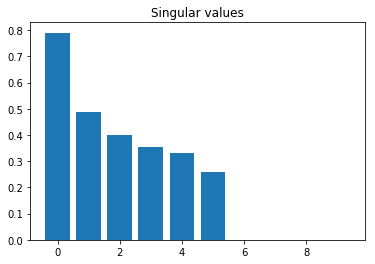

In [50]:
plt.bar(range(pca.n_components_), sv)
plt.title("Singular values")
plt.show()

In [51]:
# gender direction
g_pca_0  = pc[0]/LA.norm(pc[0])

##### All words

In [52]:
# words
ag_com = db.read('ag_com_mf_ita.txt', 'ag-com-mf')

In [53]:
# compute projections
# all words male
proj_ag_com_m_g_diff_0 =  db.prof_proj(E_ft, ag_com, g_diff_0, 'ag-com-m')
proj_ag_com_m_g_diff_1 =  db.prof_proj(E_ft, ag_com, g_diff_1, 'ag-com-m')
proj_ag_com_m_g_diff_2 =  db.prof_proj(E_ft, ag_com, g_diff_2, 'ag-com-m')
proj_ag_com_m_g_diff_3 =  db.prof_proj(E_ft, ag_com, g_diff_3, 'ag-com-m')
proj_ag_com_m_g_diff_4 =  db.prof_proj(E_ft, ag_com, g_diff_4, 'ag-com-m')
proj_ag_com_m_g_diff_5 =  db.prof_proj(E_ft, ag_com, g_diff_5, 'ag-com-m')
proj_ag_com_m_g_pca_0  =  db.prof_proj(E_ft, ag_com, g_pca_0, 'ag-com-m')

# all words female
proj_ag_com_f_g_diff_0 =  db.prof_proj(E_ft, ag_com, g_diff_0, 'ag-com-f')
proj_ag_com_f_g_diff_1 =  db.prof_proj(E_ft, ag_com, g_diff_1, 'ag-com-f')
proj_ag_com_f_g_diff_2 =  db.prof_proj(E_ft, ag_com, g_diff_2, 'ag-com-f')
proj_ag_com_f_g_diff_3 =  db.prof_proj(E_ft, ag_com, g_diff_3, 'ag-com-f')
proj_ag_com_f_g_diff_4 =  db.prof_proj(E_ft, ag_com, g_diff_4, 'ag-com-f')
proj_ag_com_f_g_diff_5 =  db.prof_proj(E_ft, ag_com, g_diff_5, 'ag-com-f')
proj_ag_com_f_g_pca_0  =  db.prof_proj(E_ft, ag_com, g_pca_0, 'ag-com-f')

In [54]:
# print ag_com_m results
ag_com_m_col0 = [] # pandas columns
ag_com_m_col1 = []
ag_com_m_col2 = []
ag_com_m_col3 = []
ag_com_m_col4 = []
ag_com_m_col5 = []
ag_com_m_col6 = []
ag_com_m_col7 = []
ag_com_m_col8 = []
ag_com_m_col9 = []

for i in range(len(proj_ag_com_m_g_diff_0)):
    ag_com_m_col0.append(proj_ag_com_m_g_diff_0[i][0]) # word
    ag_com_m_col1.append(proj_ag_com_m_g_diff_0[i][1]) # projection on g_diff_0
    ag_com_m_col2.append(proj_ag_com_m_g_diff_1[i][1]) # projection on g_diff_1
    ag_com_m_col3.append(proj_ag_com_m_g_diff_2[i][1]) # projection on g_diff_2
    ag_com_m_col4.append(proj_ag_com_m_g_diff_3[i][1]) # projection on g_diff_3
    ag_com_m_col5.append(proj_ag_com_m_g_diff_4[i][1]) # projection on g_diff_4
    ag_com_m_col6.append(proj_ag_com_m_g_diff_5[i][1]) # projection on g_diff_5 
    ag_com_m_col7.append(proj_ag_com_m_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_m_col8.append(proj_ag_com_m_g_diff_0[i][2])
    ag_com_m_col9.append(proj_ag_com_m_g_diff_0[i][3])

ag_com_m_data = {'Word':ag_com_m_col0, 
               'g_diff_0':ag_com_m_col1,
               'g_diff_1':ag_com_m_col2,
               'g_diff_2':ag_com_m_col3,
               'g_diff_3':ag_com_m_col4,
               'g_diff_4':ag_com_m_col5,
               'g_diff_5':ag_com_m_col6,                 
               'g_pca_0':ag_com_m_col7, 
               'Agency':ag_com_m_col8,
               'Communion':ag_com_m_col9}

ag_com_m_table = pd.DataFrame(ag_com_m_data)
ag_com_m_table

,Word,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,Agency,Communion
0,abile,0.105879,0.085456,0.209646,-0.004953,0.052735,0.020086,-0.136736,2.32,0.66
1,attivo,0.143503,0.108245,0.146988,0.041194,0.160946,0.094157,-0.179129,2.35,1.55
2,affettuoso,-0.057171,-0.016941,-0.044009,0.015901,-0.091345,0.022059,0.055932,-0.85,1.58
3,altruista,-0.089521,-0.001037,0.044021,0.071069,-0.114593,-0.064265,0.042477,-1.18,2.50
4,ambizioso,0.119887,0.078381,0.212807,0.054533,0.148066,0.054597,-0.171909,2.79,-0.97
5,deciso,0.032785,-0.045769,0.055098,0.042710,0.004569,-0.004292,-0.003449,2.88,0.43
6,vanitoso,-0.017311,0.009224,0.094225,0.026707,-0.014136,0.021246,-0.026286,1.29,-1.18
7,capace,0.080204,0.104048,0.024334,0.032185,-0.014518,-0.000456,-0.068718,2.45,1.08
8,confusionario,0.024486,0.013321,0.101320,0.080308,0.033662,0.025624,-0.055910,-1.89,-0.95
9,comunicativo,0.044987,0.084419,-0.038116,0.077094,-0.004863,0.061306,-0.046174,1.50,2.00


In [55]:
# ag_com_m pearson correlation
# agency correlation
r_ag_com_m_g_diff_0 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col1)[0]
r_ag_com_m_g_diff_1 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col2)[0]
r_ag_com_m_g_diff_2 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col3)[0]
r_ag_com_m_g_diff_3 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col4)[0]
r_ag_com_m_g_diff_4 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col5)[0]
r_ag_com_m_g_diff_5 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col6)[0]
r_ag_com_m_g_pca_0 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col7)[0]

p_ag_com_m_g_diff_0 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col1)[1]
p_ag_com_m_g_diff_1 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col2)[1]
p_ag_com_m_g_diff_2 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col3)[1]
p_ag_com_m_g_diff_3 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col4)[1]
p_ag_com_m_g_diff_4 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col5)[1]
p_ag_com_m_g_diff_5 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col6)[1]
p_ag_com_m_g_pca_0 = scipy.stats.pearsonr(ag_com_m_col8, ag_com_m_col7)[1]

In [56]:
pearson_data = {'g_diff_0':[r_ag_com_m_g_diff_0,p_ag_com_m_g_diff_0],
                'g_diff_1':[r_ag_com_m_g_diff_1,p_ag_com_m_g_diff_1],
                'g_diff_2':[r_ag_com_m_g_diff_2,p_ag_com_m_g_diff_2],
                'g_diff_3':[r_ag_com_m_g_diff_3,p_ag_com_m_g_diff_3],
                'g_diff_4':[r_ag_com_m_g_diff_4,p_ag_com_m_g_diff_4],
                'g_diff_5':[r_ag_com_m_g_diff_5,p_ag_com_m_g_diff_5],
                'g_pca_0':[r_ag_com_m_g_pca_0,p_ag_com_m_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency male correlation")
pearson_table

Agency male correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.354973,0.046493,0.192881,-0.134258,0.354657,0.119124,-0.272076
p,0.004999,0.721991,0.136406,0.302273,0.005040,0.360507,0.033904


In [57]:
# ag_com_m pearson correlation
# communion correlation
r_ag_com_m_g_diff_0 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col1)[0]
r_ag_com_m_g_diff_1 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col2)[0]
r_ag_com_m_g_diff_2 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col3)[0]
r_ag_com_m_g_diff_3 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col4)[0]
r_ag_com_m_g_diff_4 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col5)[0]
r_ag_com_m_g_diff_5 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col6)[0]
r_ag_com_m_g_pca_0 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col7)[0]

p_ag_com_m_g_diff_0 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col1)[1]
p_ag_com_m_g_diff_1 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col2)[1]
p_ag_com_m_g_diff_2 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col3)[1]
p_ag_com_m_g_diff_3 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col4)[1]
p_ag_com_m_g_diff_4 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col5)[1]
p_ag_com_m_g_diff_5 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col6)[1]
p_ag_com_m_g_pca_0 = scipy.stats.pearsonr(ag_com_m_col9, ag_com_m_col7)[1]

In [58]:
pearson_data = {'g_diff_0':[r_ag_com_m_g_diff_0,p_ag_com_m_g_diff_0],
                'g_diff_1':[r_ag_com_m_g_diff_1,p_ag_com_m_g_diff_1],
                'g_diff_2':[r_ag_com_m_g_diff_2,p_ag_com_m_g_diff_2],
                'g_diff_3':[r_ag_com_m_g_diff_3,p_ag_com_m_g_diff_3],
                'g_diff_4':[r_ag_com_m_g_diff_4,p_ag_com_m_g_diff_4],
                'g_diff_5':[r_ag_com_m_g_diff_5,p_ag_com_m_g_diff_5],
                'g_pca_0':[r_ag_com_m_g_pca_0,p_ag_com_m_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion male correlation")
pearson_table

Communion male correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.013240,0.173427,-0.120003,-0.029445,-0.281834,-0.203205,0.076689
p,0.919331,0.181340,0.356947,0.821771,0.027773,0.116255,0.556910


In [59]:
# print ag_com_f results
ag_com_f_col0 = [] # pandas columns
ag_com_f_col1 = []
ag_com_f_col2 = []
ag_com_f_col3 = []
ag_com_f_col4 = []
ag_com_f_col5 = []
ag_com_f_col6 = []
ag_com_f_col7 = []
ag_com_f_col8 = []
ag_com_f_col9 = []

for i in range(len(proj_ag_com_f_g_diff_0)):
    ag_com_f_col0.append(proj_ag_com_f_g_diff_0[i][0]) # word
    ag_com_f_col1.append(proj_ag_com_f_g_diff_0[i][1]) # projection on g_diff_0
    ag_com_f_col2.append(proj_ag_com_f_g_diff_1[i][1]) # projection on g_diff_1
    ag_com_f_col3.append(proj_ag_com_f_g_diff_2[i][1]) # projection on g_diff_2
    ag_com_f_col4.append(proj_ag_com_f_g_diff_3[i][1]) # projection on g_diff_3
    ag_com_f_col5.append(proj_ag_com_f_g_diff_4[i][1]) # projection on g_diff_4
    ag_com_f_col6.append(proj_ag_com_f_g_diff_5[i][1]) # projection on g_diff_5 
    ag_com_f_col7.append(proj_ag_com_f_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_f_col8.append(proj_ag_com_f_g_diff_0[i][2])
    ag_com_f_col9.append(proj_ag_com_f_g_diff_0[i][3])

ag_com_f_data = {'Word':ag_com_f_col0, 
               'g_diff_0':ag_com_f_col1,
               'g_diff_1':ag_com_f_col2,
               'g_diff_2':ag_com_f_col3,
               'g_diff_3':ag_com_f_col4,
               'g_diff_4':ag_com_f_col5,
               'g_diff_5':ag_com_f_col6,                 
               'g_pca_0':ag_com_f_col7, 
               'Agency':ag_com_f_col8,
               'Communion':ag_com_f_col9}

ag_com_f_table = pd.DataFrame(ag_com_f_data)
ag_com_f_table

,Word,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,Agency,Communion
0,abile,0.105879,0.085456,0.209646,-0.004953,0.052735,0.020086,-0.136736,2.32,0.66
1,attiva,-0.036062,-0.043390,-0.010747,0.063460,-0.041220,-0.050550,0.044248,2.35,1.55
2,affettuosa,-0.107710,-0.108878,-0.096063,-0.024297,-0.187755,-0.045881,0.160871,-0.85,1.58
3,altruista,-0.089521,-0.001037,0.044021,0.071069,-0.114593,-0.064265,0.042477,-1.18,2.50
4,ambiziosa,-0.060695,-0.167291,-0.011912,0.049816,-0.130847,-0.109553,0.140713,2.79,-0.97
5,decisa,-0.012327,-0.152073,-0.035123,0.052654,-0.130089,-0.027937,0.122522,2.88,0.43
6,vanitosa,-0.197048,-0.210013,-0.075272,0.023405,-0.232198,-0.063912,0.232705,1.29,-1.18
7,capace,0.080204,0.104048,0.024334,0.032185,-0.014518,-0.000456,-0.068718,2.45,1.08
8,confusionaria,-0.062482,-0.125339,-0.097832,0.058949,-0.144404,-0.105083,0.148428,-1.89,-0.95
9,comunicativa,0.000084,-0.003434,-0.098349,0.029150,-0.097443,-0.037358,0.060134,1.50,2.00


In [60]:
# ag_com_f pearson correlation
# agency correlation
r_ag_com_f_g_diff_0 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col1)[0]
r_ag_com_f_g_diff_1 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col2)[0]
r_ag_com_f_g_diff_2 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col3)[0]
r_ag_com_f_g_diff_3 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col4)[0]
r_ag_com_f_g_diff_4 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col5)[0]
r_ag_com_f_g_diff_5 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col6)[0]
r_ag_com_f_g_pca_0 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col7)[0]

p_ag_com_f_g_diff_0 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col1)[1]
p_ag_com_f_g_diff_1 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col2)[1]
p_ag_com_f_g_diff_2 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col3)[1]
p_ag_com_f_g_diff_3 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col4)[1]
p_ag_com_f_g_diff_4 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col5)[1]
p_ag_com_f_g_diff_5 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col6)[1]
p_ag_com_f_g_pca_0 = scipy.stats.pearsonr(ag_com_f_col8, ag_com_f_col7)[1]

In [61]:
pearson_data = {'g_diff_0':[r_ag_com_f_g_diff_0,p_ag_com_f_g_diff_0],
                'g_diff_1':[r_ag_com_f_g_diff_1,p_ag_com_f_g_diff_1],
                'g_diff_2':[r_ag_com_f_g_diff_2,p_ag_com_f_g_diff_2],
                'g_diff_3':[r_ag_com_f_g_diff_3,p_ag_com_f_g_diff_3],
                'g_diff_4':[r_ag_com_f_g_diff_4,p_ag_com_f_g_diff_4],
                'g_diff_5':[r_ag_com_f_g_diff_5,p_ag_com_f_g_diff_5],
                'g_pca_0':[r_ag_com_f_g_pca_0,p_ag_com_f_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency female correlation")
pearson_table

Agency female correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.339154,0.091639,0.278687,-0.079966,0.366978,0.298610,-0.279888
p,0.008028,0.486198,0.031068,0.543612,0.003925,0.020476,0.030320


In [62]:
# ag_com_f pearson correlation
# communion correlation
r_ag_com_f_g_diff_0 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col1)[0]
r_ag_com_f_g_diff_1 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col2)[0]
r_ag_com_f_g_diff_2 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col3)[0]
r_ag_com_f_g_diff_3 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col4)[0]
r_ag_com_f_g_diff_4 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col5)[0]
r_ag_com_f_g_diff_5 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col6)[0]
r_ag_com_f_g_pca_0 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col7)[0]

p_ag_com_f_g_diff_0 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col1)[1]
p_ag_com_f_g_diff_1 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col2)[1]
p_ag_com_f_g_diff_2 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col3)[1]
p_ag_com_f_g_diff_3 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col4)[1]
p_ag_com_f_g_diff_4 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col5)[1]
p_ag_com_f_g_diff_5 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col6)[1]
p_ag_com_f_g_pca_0 = scipy.stats.pearsonr(ag_com_f_col9, ag_com_f_col7)[1]

In [63]:
pearson_data = {'g_diff_0':[r_ag_com_f_g_diff_0,p_ag_com_f_g_diff_0],
                'g_diff_1':[r_ag_com_f_g_diff_1,p_ag_com_f_g_diff_1],
                'g_diff_2':[r_ag_com_f_g_diff_2,p_ag_com_f_g_diff_2],
                'g_diff_3':[r_ag_com_f_g_diff_3,p_ag_com_f_g_diff_3],
                'g_diff_4':[r_ag_com_f_g_diff_4,p_ag_com_f_g_diff_4],
                'g_diff_5':[r_ag_com_f_g_diff_5,p_ag_com_f_g_diff_5],
                'g_pca_0':[r_ag_com_f_g_pca_0,p_ag_com_f_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion female correlation")
pearson_table

Communion female correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.198439,0.332654,0.143687,-0.049740,0.024673,-0.026080,-0.222004
p,0.128530,0.009406,0.273394,0.705868,0.851562,0.843202,0.088230


##### Ungendered words

In [64]:
# words
ag_com_ung = db.read('ag_com_ung_ita.txt', 'ag-com-mf')

In [65]:
# compute projections
# all words ungendered
proj_ag_com_ung_g_diff_0 =  db.prof_proj(E_ft, ag_com_ung, g_diff_0, 'ag-com-m')
proj_ag_com_ung_g_diff_1 =  db.prof_proj(E_ft, ag_com_ung, g_diff_1, 'ag-com-m')
proj_ag_com_ung_g_diff_2 =  db.prof_proj(E_ft, ag_com_ung, g_diff_2, 'ag-com-m')
proj_ag_com_ung_g_diff_3 =  db.prof_proj(E_ft, ag_com_ung, g_diff_3, 'ag-com-m')
proj_ag_com_ung_g_diff_4 =  db.prof_proj(E_ft, ag_com_ung, g_diff_4, 'ag-com-m')
proj_ag_com_ung_g_diff_5 =  db.prof_proj(E_ft, ag_com_ung, g_diff_5, 'ag-com-m')
proj_ag_com_ung_g_pca_0  =  db.prof_proj(E_ft, ag_com_ung, g_pca_0, 'ag-com-m')

In [66]:
# print ag_com_ung results
ag_com_ung_col0 = [] # pandas columns
ag_com_ung_col1 = []
ag_com_ung_col2 = []
ag_com_ung_col3 = []
ag_com_ung_col4 = []
ag_com_ung_col5 = []
ag_com_ung_col6 = []
ag_com_ung_col7 = []
ag_com_ung_col8 = []
ag_com_ung_col9 = []

for i in range(len(proj_ag_com_ung_g_diff_0)):
    ag_com_ung_col0.append(proj_ag_com_ung_g_diff_0[i][0]) # word
    ag_com_ung_col1.append(proj_ag_com_ung_g_diff_0[i][1]) # projection on g_diff_0
    ag_com_ung_col2.append(proj_ag_com_ung_g_diff_1[i][1]) # projection on g_diff_1
    ag_com_ung_col3.append(proj_ag_com_ung_g_diff_2[i][1]) # projection on g_diff_2
    ag_com_ung_col4.append(proj_ag_com_ung_g_diff_3[i][1]) # projection on g_diff_3
    ag_com_ung_col5.append(proj_ag_com_ung_g_diff_4[i][1]) # projection on g_diff_4
    ag_com_ung_col6.append(proj_ag_com_ung_g_diff_5[i][1]) # projection on g_diff_5 
    ag_com_ung_col7.append(proj_ag_com_ung_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_ung_col8.append(proj_ag_com_ung_g_diff_0[i][2])
    ag_com_ung_col9.append(proj_ag_com_ung_g_diff_0[i][3])

ag_com_ung_data = {'Word':ag_com_ung_col0, 
               'g_diff_0':ag_com_ung_col1,
               'g_diff_1':ag_com_ung_col2,
               'g_diff_2':ag_com_ung_col3,
               'g_diff_3':ag_com_ung_col4,
               'g_diff_4':ag_com_ung_col5,
               'g_diff_5':ag_com_ung_col6,                 
               'g_pca_0':ag_com_ung_col7, 
               'Agency':ag_com_ung_col8,
               'Communion':ag_com_ung_col9}

ag_com_ung_table = pd.DataFrame(ag_com_ung_data)
ag_com_ung_table

,Word,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,Agency,Communion
0,abile,0.105879,0.085456,0.209646,-0.004953,0.052735,0.020086,-0.136736,2.32,0.66
1,altruista,-0.089521,-0.001037,0.044021,0.071069,-0.114593,-0.064265,0.042477,-1.18,2.50
2,capace,0.080204,0.104048,0.024334,0.032185,-0.014518,-0.000456,-0.068718,2.45,1.08
3,competente,0.112466,-0.020832,0.051811,0.051029,0.042726,0.001656,-0.042337,2.21,0.61
4,coerente,0.087400,0.073252,-0.030718,0.019931,-0.006704,0.007037,-0.042743,0.74,1.68
5,dominante,-0.015997,-0.020473,-0.105563,0.026437,0.028925,0.057472,0.026745,2.76,-1.89
6,amichevole,0.051062,0.019735,0.046436,-0.007896,-0.053028,-0.053873,-0.010913,0.15,2.23
7,disponibile,-0.095916,0.010554,-0.029922,0.047310,-0.060039,-0.108595,0.047888,-0.42,2.76
8,egoista,-0.081983,0.060798,0.050116,0.059389,-0.047300,0.001273,-0.015433,1.53,-2.50
9,indipendente,0.028278,-0.046452,-0.084296,-0.046309,0.021417,-0.024784,0.038029,2.65,-0.83


In [67]:
# ag_com_ung pearson correlation
# agency correlation
r_ag_com_ung_g_diff_0 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col1)[0]
r_ag_com_ung_g_diff_1 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col2)[0]
r_ag_com_ung_g_diff_2 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col3)[0]
r_ag_com_ung_g_diff_3 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col4)[0]
r_ag_com_ung_g_diff_4 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col5)[0]
r_ag_com_ung_g_diff_5 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col6)[0]
r_ag_com_ung_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col7)[0]

p_ag_com_ung_g_diff_0 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col1)[1]
p_ag_com_ung_g_diff_1 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col2)[1]
p_ag_com_ung_g_diff_2 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col3)[1]
p_ag_com_ung_g_diff_3 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col4)[1]
p_ag_com_ung_g_diff_4 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col5)[1]
p_ag_com_ung_g_diff_5 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col6)[1]
p_ag_com_ung_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col8, ag_com_ung_col7)[1]

In [68]:
pearson_data = {'g_diff_0':[r_ag_com_ung_g_diff_0,p_ag_com_ung_g_diff_0],
                'g_diff_1':[r_ag_com_ung_g_diff_1,p_ag_com_ung_g_diff_1],
                'g_diff_2':[r_ag_com_ung_g_diff_2,p_ag_com_ung_g_diff_2],
                'g_diff_3':[r_ag_com_ung_g_diff_3,p_ag_com_ung_g_diff_3],
                'g_diff_4':[r_ag_com_ung_g_diff_4,p_ag_com_ung_g_diff_4],
                'g_diff_5':[r_ag_com_ung_g_diff_5,p_ag_com_ung_g_diff_5],
                'g_pca_0':[r_ag_com_ung_g_pca_0,p_ag_com_ung_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency ungendered correlation")
pearson_table

Agency ungendered correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.268311,0.045605,0.147038,-0.151740,0.530286,0.369977,-0.319935
p,0.239601,0.844380,0.524759,0.511437,0.013404,0.098776,0.157411


In [69]:
# ag_com_ung pearson correlation
# communion correlation
r_ag_com_ung_g_diff_0 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col1)[0]
r_ag_com_ung_g_diff_1 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col2)[0]
r_ag_com_ung_g_diff_2 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col3)[0]
r_ag_com_ung_g_diff_3 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col4)[0]
r_ag_com_ung_g_diff_4 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col5)[0]
r_ag_com_ung_g_diff_5 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col6)[0]
r_ag_com_ung_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col7)[0]

p_ag_com_ung_g_diff_0 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col1)[1]
p_ag_com_ung_g_diff_1 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col2)[1]
p_ag_com_ung_g_diff_2 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col3)[1]
p_ag_com_ung_g_diff_3 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col4)[1]
p_ag_com_ung_g_diff_4 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col5)[1]
p_ag_com_ung_g_diff_5 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col6)[1]
p_ag_com_ung_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col9, ag_com_ung_col7)[1]

In [70]:
pearson_data = {'g_diff_0':[r_ag_com_ung_g_diff_0,p_ag_com_ung_g_diff_0],
                'g_diff_1':[r_ag_com_ung_g_diff_1,p_ag_com_ung_g_diff_1],
                'g_diff_2':[r_ag_com_ung_g_diff_2,p_ag_com_ung_g_diff_2],
                'g_diff_3':[r_ag_com_ung_g_diff_3,p_ag_com_ung_g_diff_3],
                'g_diff_4':[r_ag_com_ung_g_diff_4,p_ag_com_ung_g_diff_4],
                'g_diff_5':[r_ag_com_ung_g_diff_5,p_ag_com_ung_g_diff_5],
                'g_pca_0':[r_ag_com_ung_g_pca_0,p_ag_com_ung_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion ungendered correlation")
pearson_table

Communion ungendered correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.120362,0.187834,0.155116,0.108377,-0.367119,-0.500349,-0.031481
p,0.603279,0.414872,0.501973,0.640059,0.101613,0.020888,0.892247


##### Gendered words

In [71]:
# words
ag_com_gen = db.read('ag_com_gen_ita.txt', 'ag-com-mf')

In [72]:
# compute projections
# male
proj_ag_com_gen_m_g_diff_0 =  db.prof_proj(E_ft, ag_com_gen, g_diff_0, 'ag-com-m')
proj_ag_com_gen_m_g_diff_1 =  db.prof_proj(E_ft, ag_com_gen, g_diff_1, 'ag-com-m')
proj_ag_com_gen_m_g_diff_2 =  db.prof_proj(E_ft, ag_com_gen, g_diff_2, 'ag-com-m')
proj_ag_com_gen_m_g_diff_3 =  db.prof_proj(E_ft, ag_com_gen, g_diff_3, 'ag-com-m')
proj_ag_com_gen_m_g_diff_4 =  db.prof_proj(E_ft, ag_com_gen, g_diff_4, 'ag-com-m')
proj_ag_com_gen_m_g_diff_5 =  db.prof_proj(E_ft, ag_com_gen, g_diff_5, 'ag-com-m')
proj_ag_com_gen_m_g_pca_0  =  db.prof_proj(E_ft, ag_com_gen, g_pca_0, 'ag-com-m')

# female
proj_ag_com_gen_f_g_diff_0 =  db.prof_proj(E_ft, ag_com_gen, g_diff_0, 'ag-com-f')
proj_ag_com_gen_f_g_diff_1 =  db.prof_proj(E_ft, ag_com_gen, g_diff_1, 'ag-com-f')
proj_ag_com_gen_f_g_diff_2 =  db.prof_proj(E_ft, ag_com_gen, g_diff_2, 'ag-com-f')
proj_ag_com_gen_f_g_diff_3 =  db.prof_proj(E_ft, ag_com_gen, g_diff_3, 'ag-com-f')
proj_ag_com_gen_f_g_diff_4 =  db.prof_proj(E_ft, ag_com_gen, g_diff_4, 'ag-com-f')
proj_ag_com_gen_f_g_diff_5 =  db.prof_proj(E_ft, ag_com_gen, g_diff_5, 'ag-com-f')
proj_ag_com_gen_f_g_pca_0  =  db.prof_proj(E_ft, ag_com_gen, g_pca_0, 'ag-com-f')

In [73]:
# print ag_com_gen_m results
ag_com_gen_m_col0 = [] # pandas columns
ag_com_gen_m_col1 = []
ag_com_gen_m_col2 = []
ag_com_gen_m_col3 = []
ag_com_gen_m_col4 = []
ag_com_gen_m_col5 = []
ag_com_gen_m_col6 = []
ag_com_gen_m_col7 = []
ag_com_gen_m_col8 = []
ag_com_gen_m_col9 = []

for i in range(len(proj_ag_com_gen_m_g_diff_0)):
    ag_com_gen_m_col0.append(proj_ag_com_gen_m_g_diff_0[i][0]) # word
    ag_com_gen_m_col1.append(proj_ag_com_gen_m_g_diff_0[i][1]) # projection on g_diff_0
    ag_com_gen_m_col2.append(proj_ag_com_gen_m_g_diff_1[i][1]) # projection on g_diff_1
    ag_com_gen_m_col3.append(proj_ag_com_gen_m_g_diff_2[i][1]) # projection on g_diff_2
    ag_com_gen_m_col4.append(proj_ag_com_gen_m_g_diff_3[i][1]) # projection on g_diff_3
    ag_com_gen_m_col5.append(proj_ag_com_gen_m_g_diff_4[i][1]) # projection on g_diff_4
    ag_com_gen_m_col6.append(proj_ag_com_gen_m_g_diff_5[i][1]) # projection on g_diff_5 
    ag_com_gen_m_col7.append(proj_ag_com_gen_m_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_gen_m_col8.append(proj_ag_com_gen_m_g_diff_0[i][2])
    ag_com_gen_m_col9.append(proj_ag_com_gen_m_g_diff_0[i][3])

ag_com_gen_m_data = {'Word':ag_com_gen_m_col0, 
               'g_diff_0':ag_com_gen_m_col1,
               'g_diff_1':ag_com_gen_m_col2,
               'g_diff_2':ag_com_gen_m_col3,
               'g_diff_3':ag_com_gen_m_col4,
               'g_diff_4':ag_com_gen_m_col5,
               'g_diff_5':ag_com_gen_m_col6,                 
               'g_pca_0':ag_com_gen_m_col7, 
               'Agency':ag_com_gen_m_col8,
               'Communion':ag_com_gen_m_col9}

ag_com_gen_m_table = pd.DataFrame(ag_com_gen_m_data)
ag_com_gen_m_table

,Word,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,Agency,Communion
0,attivo,0.143503,0.108245,0.146988,0.041194,0.160946,0.094157,-0.179129,2.35,1.55
1,affettuoso,-0.057171,-0.016941,-0.044009,0.015901,-0.091345,0.022059,0.055932,-0.85,1.58
2,ambizioso,0.119887,0.078381,0.212807,0.054533,0.148066,0.054597,-0.171909,2.79,-0.97
3,deciso,0.032785,-0.045769,0.055098,0.042710,0.004569,-0.004292,-0.003449,2.88,0.43
4,vanitoso,-0.017311,0.009224,0.094225,0.026707,-0.014136,0.021246,-0.026286,1.29,-1.18
5,confusionario,0.024486,0.013321,0.101320,0.080308,0.033662,0.025624,-0.055910,-1.89,-0.95
6,comunicativo,0.044987,0.084419,-0.038116,0.077094,-0.004863,0.061306,-0.046174,1.50,2.00
7,competitivo,0.049996,0.109333,0.074823,0.124320,0.105586,0.019535,-0.121939,2.71,-1.39
8,presuntuoso,0.086057,0.059458,0.110119,0.022327,0.019496,0.053044,-0.087454,1.53,-1.50
9,coscienzioso,0.136342,0.055798,0.107486,0.016284,0.039246,0.005561,-0.096060,0.58,1.32


In [74]:
# ag_com_gen_m pearson correlation
# agency correlation
r_ag_com_gen_m_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col1)[0]
r_ag_com_gen_m_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col2)[0]
r_ag_com_gen_m_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col3)[0]
r_ag_com_gen_m_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col4)[0]
r_ag_com_gen_m_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col5)[0]
r_ag_com_gen_m_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col6)[0]
r_ag_com_gen_m_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col7)[0]

p_ag_com_gen_m_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col1)[1]
p_ag_com_gen_m_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col2)[1]
p_ag_com_gen_m_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col3)[1]
p_ag_com_gen_m_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col4)[1]
p_ag_com_gen_m_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col5)[1]
p_ag_com_gen_m_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col6)[1]
p_ag_com_gen_m_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_m_col8, ag_com_gen_m_col7)[1]

In [75]:
pearson_data = {'g_diff_0':[r_ag_com_gen_m_g_diff_0,p_ag_com_gen_m_g_diff_0],
                'g_diff_1':[r_ag_com_gen_m_g_diff_1,p_ag_com_gen_m_g_diff_1],
                'g_diff_2':[r_ag_com_gen_m_g_diff_2,p_ag_com_gen_m_g_diff_2],
                'g_diff_3':[r_ag_com_gen_m_g_diff_3,p_ag_com_gen_m_g_diff_3],
                'g_diff_4':[r_ag_com_gen_m_g_diff_4,p_ag_com_gen_m_g_diff_4],
                'g_diff_5':[r_ag_com_gen_m_g_diff_5,p_ag_com_gen_m_g_diff_5],
                'g_pca_0':[r_ag_com_gen_m_g_pca_0,p_ag_com_gen_m_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency male correlation")
pearson_table

Agency male correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.433671,0.057905,0.254834,-0.118011,0.391269,0.088401,-0.318585
p,0.005181,0.722656,0.112528,0.468306,0.012541,0.587519,0.045117


In [76]:
# ag_com_gen_m pearson correlation
# communion correlation
r_ag_com_gen_m_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col1)[0]
r_ag_com_gen_m_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col2)[0]
r_ag_com_gen_m_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col3)[0]
r_ag_com_gen_m_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col4)[0]
r_ag_com_gen_m_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col5)[0]
r_ag_com_gen_m_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col6)[0]
r_ag_com_gen_m_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col7)[0]

p_ag_com_gen_m_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col1)[1]
p_ag_com_gen_m_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col2)[1]
p_ag_com_gen_m_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col3)[1]
p_ag_com_gen_m_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col4)[1]
p_ag_com_gen_m_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col5)[1]
p_ag_com_gen_m_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col6)[1]
p_ag_com_gen_m_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_m_col9, ag_com_gen_m_col7)[1]

In [77]:
pearson_data = {'g_diff_0':[r_ag_com_gen_m_g_diff_0,p_ag_com_gen_m_g_diff_0],
                'g_diff_1':[r_ag_com_gen_m_g_diff_1,p_ag_com_gen_m_g_diff_1],
                'g_diff_2':[r_ag_com_gen_m_g_diff_2,p_ag_com_gen_m_g_diff_2],
                'g_diff_3':[r_ag_com_gen_m_g_diff_3,p_ag_com_gen_m_g_diff_3],
                'g_diff_4':[r_ag_com_gen_m_g_diff_4,p_ag_com_gen_m_g_diff_4],
                'g_diff_5':[r_ag_com_gen_m_g_diff_5,p_ag_com_gen_m_g_diff_5],
                'g_pca_0':[r_ag_com_gen_m_g_pca_0,p_ag_com_gen_m_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion male correlation")
pearson_table

Communion male correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,-0.009660,0.226357,-0.204485,0.012714,-0.150439,0.094021,0.015752
p,0.952827,0.160164,0.205624,0.937935,0.354146,0.563895,0.923144


In [78]:
# print ag_com_gen_f results
ag_com_gen_f_col0 = [] # pandas columns
ag_com_gen_f_col1 = []
ag_com_gen_f_col2 = []
ag_com_gen_f_col3 = []
ag_com_gen_f_col4 = []
ag_com_gen_f_col5 = []
ag_com_gen_f_col6 = []
ag_com_gen_f_col7 = []
ag_com_gen_f_col8 = []
ag_com_gen_f_col9 = []

for i in range(len(proj_ag_com_gen_f_g_diff_0)):
    ag_com_gen_f_col0.append(proj_ag_com_gen_f_g_diff_0[i][0]) # word
    ag_com_gen_f_col1.append(proj_ag_com_gen_f_g_diff_0[i][1]) # projection on g_diff_0
    ag_com_gen_f_col2.append(proj_ag_com_gen_f_g_diff_1[i][1]) # projection on g_diff_1
    ag_com_gen_f_col3.append(proj_ag_com_gen_f_g_diff_2[i][1]) # projection on g_diff_2
    ag_com_gen_f_col4.append(proj_ag_com_gen_f_g_diff_3[i][1]) # projection on g_diff_3
    ag_com_gen_f_col5.append(proj_ag_com_gen_f_g_diff_4[i][1]) # projection on g_diff_4
    ag_com_gen_f_col6.append(proj_ag_com_gen_f_g_diff_5[i][1]) # projection on g_diff_5 
    ag_com_gen_f_col7.append(proj_ag_com_gen_f_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_gen_f_col8.append(proj_ag_com_gen_f_g_diff_0[i][2])
    ag_com_gen_f_col9.append(proj_ag_com_gen_f_g_diff_0[i][3])

ag_com_gen_f_data = {'Word':ag_com_gen_f_col0, 
               'g_diff_0':ag_com_gen_f_col1,
               'g_diff_1':ag_com_gen_f_col2,
               'g_diff_2':ag_com_gen_f_col3,
               'g_diff_3':ag_com_gen_f_col4,
               'g_diff_4':ag_com_gen_f_col5,
               'g_diff_5':ag_com_gen_f_col6,                 
               'g_pca_0':ag_com_gen_f_col7, 
               'Agency':ag_com_gen_f_col8,
               'Communion':ag_com_gen_f_col9}

ag_com_gen_f_table = pd.DataFrame(ag_com_gen_f_data)
ag_com_gen_f_table

,Word,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,Agency,Communion
0,attiva,-0.036062,-0.043390,-0.010747,0.063460,-0.041220,-0.050550,0.044248,2.35,1.55
1,affettuosa,-0.107710,-0.108878,-0.096063,-0.024297,-0.187755,-0.045881,0.160871,-0.85,1.58
2,ambiziosa,-0.060695,-0.167291,-0.011912,0.049816,-0.130847,-0.109553,0.140713,2.79,-0.97
3,decisa,-0.012327,-0.152073,-0.035123,0.052654,-0.130089,-0.027937,0.122522,2.88,0.43
4,vanitosa,-0.197048,-0.210013,-0.075272,0.023405,-0.232198,-0.063912,0.232705,1.29,-1.18
5,confusionaria,-0.062482,-0.125339,-0.097832,0.058949,-0.144404,-0.105083,0.148428,-1.89,-0.95
6,comunicativa,0.000084,-0.003434,-0.098349,0.029150,-0.097443,-0.037358,0.060134,1.50,2.00
7,competitiva,-0.032577,-0.064117,-0.015585,0.083417,-0.035440,-0.071689,0.053857,2.71,-1.39
8,presuntuosa,-0.033390,-0.081876,-0.014475,-0.038199,-0.166916,-0.051169,0.105836,1.53,-1.50
9,coscienziosa,0.020929,-0.081802,-0.038187,-0.000071,-0.129738,-0.109779,0.094075,0.58,1.32


In [79]:
# ag_com_gen_f pearson correlation
# agency correlation
r_ag_com_gen_f_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col1)[0]
r_ag_com_gen_f_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col2)[0]
r_ag_com_gen_f_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col3)[0]
r_ag_com_gen_f_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col4)[0]
r_ag_com_gen_f_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col5)[0]
r_ag_com_gen_f_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col6)[0]
r_ag_com_gen_f_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col7)[0]

p_ag_com_gen_f_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col1)[1]
p_ag_com_gen_f_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col2)[1]
p_ag_com_gen_f_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col3)[1]
p_ag_com_gen_f_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col4)[1]
p_ag_com_gen_f_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col5)[1]
p_ag_com_gen_f_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col6)[1]
p_ag_com_gen_f_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_f_col8, ag_com_gen_f_col7)[1]

In [80]:
pearson_data = {'g_diff_0':[r_ag_com_gen_f_g_diff_0,p_ag_com_gen_f_g_diff_0],
                'g_diff_1':[r_ag_com_gen_f_g_diff_1,p_ag_com_gen_f_g_diff_1],
                'g_diff_2':[r_ag_com_gen_f_g_diff_2,p_ag_com_gen_f_g_diff_2],
                'g_diff_3':[r_ag_com_gen_f_g_diff_3,p_ag_com_gen_f_g_diff_3],
                'g_diff_4':[r_ag_com_gen_f_g_diff_4,p_ag_com_gen_f_g_diff_4],
                'g_diff_5':[r_ag_com_gen_f_g_diff_5,p_ag_com_gen_f_g_diff_5],
                'g_pca_0':[r_ag_com_gen_f_g_pca_0,p_ag_com_gen_f_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency female correlation")
pearson_table

Agency female correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.410120,0.117977,0.431132,-0.044612,0.391384,0.290687,-0.380965
p,0.009513,0.474426,0.006141,0.787413,0.013746,0.072611,0.016724


In [81]:
# ag_com_gen_f pearson correlation
# communion correlation
r_ag_com_gen_f_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col1)[0]
r_ag_com_gen_f_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col2)[0]
r_ag_com_gen_f_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col3)[0]
r_ag_com_gen_f_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col4)[0]
r_ag_com_gen_f_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col5)[0]
r_ag_com_gen_f_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col6)[0]
r_ag_com_gen_f_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col7)[0]

p_ag_com_gen_f_g_diff_0 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col1)[1]
p_ag_com_gen_f_g_diff_1 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col2)[1]
p_ag_com_gen_f_g_diff_2 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col3)[1]
p_ag_com_gen_f_g_diff_3 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col4)[1]
p_ag_com_gen_f_g_diff_4 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col5)[1]
p_ag_com_gen_f_g_diff_5 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col6)[1]
p_ag_com_gen_f_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_f_col9, ag_com_gen_f_col7)[1]

In [82]:
pearson_data = {'g_diff_0':[r_ag_com_gen_f_g_diff_0,p_ag_com_gen_f_g_diff_0],
                'g_diff_1':[r_ag_com_gen_f_g_diff_1,p_ag_com_gen_f_g_diff_1],
                'g_diff_2':[r_ag_com_gen_f_g_diff_2,p_ag_com_gen_f_g_diff_2],
                'g_diff_3':[r_ag_com_gen_f_g_diff_3,p_ag_com_gen_f_g_diff_3],
                'g_diff_4':[r_ag_com_gen_f_g_diff_4,p_ag_com_gen_f_g_diff_4],
                'g_diff_5':[r_ag_com_gen_f_g_diff_5,p_ag_com_gen_f_g_diff_5],
                'g_pca_0':[r_ag_com_gen_f_g_pca_0,p_ag_com_gen_f_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion male correlation")
pearson_table

Communion male correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.126395,0.333510,-0.050271,-0.122842,-0.004796,0.089528,-0.162719
p,0.443237,0.038003,0.761187,0.456262,0.976883,0.587817,0.322304


##### Ungendered + mean gendered words

In [94]:
# print ag_com_mean results
ag_com_mean_col0 = [] # pandas columns
ag_com_mean_col1 = []
ag_com_mean_col2 = []
ag_com_mean_col3 = []
ag_com_mean_col4 = []
ag_com_mean_col5 = []
ag_com_mean_col6 = []
ag_com_mean_col7 = []
ag_com_mean_col8 = []
ag_com_mean_col9 = []

for i in range(len(proj_ag_com_ung_g_diff_0)):
    ag_com_mean_col0.append(proj_ag_com_ung_g_diff_0[i][0]) # word
    ag_com_mean_col1.append(proj_ag_com_ung_g_diff_0[i][1]) # projection on g_diff_0
    ag_com_mean_col2.append(proj_ag_com_ung_g_diff_1[i][1]) # projection on g_diff_1
    ag_com_mean_col3.append(proj_ag_com_ung_g_diff_2[i][1]) # projection on g_diff_2
    ag_com_mean_col4.append(proj_ag_com_ung_g_diff_3[i][1]) # projection on g_diff_3
    ag_com_mean_col5.append(proj_ag_com_ung_g_diff_4[i][1]) # projection on g_diff_4
    ag_com_mean_col6.append(proj_ag_com_ung_g_diff_5[i][1]) # projection on g_diff_5 
    ag_com_mean_col7.append(proj_ag_com_ung_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_mean_col8.append(proj_ag_com_ung_g_diff_0[i][2])
    ag_com_mean_col9.append(proj_ag_com_ung_g_diff_0[i][3])

proj_ag_com_gen_m_g_diff_0.pop(34) # delete 'supportivo'

for i in range(len(proj_ag_com_gen_m_g_diff_0)):
    if (proj_ag_com_gen_m_g_diff_0[i][0] == 'supportivo'):
        print('male')
    ag_com_mean_col0.append(proj_ag_com_gen_m_g_diff_0[i][0]) # word
    ag_com_mean_col1.append((proj_ag_com_gen_m_g_diff_0[i][1]+proj_ag_com_gen_f_g_diff_0[i][1])/2) # projection on g_diff_0
    ag_com_mean_col2.append((proj_ag_com_gen_m_g_diff_1[i][1]+proj_ag_com_gen_f_g_diff_1[i][1])/2) # projection on g_diff_1
    ag_com_mean_col3.append((proj_ag_com_gen_m_g_diff_2[i][1]+proj_ag_com_gen_f_g_diff_2[i][1])/2) # projection on g_diff_2
    ag_com_mean_col4.append((proj_ag_com_gen_m_g_diff_3[i][1]+proj_ag_com_gen_f_g_diff_3[i][1])/2) # projection on g_diff_3
    ag_com_mean_col5.append((proj_ag_com_gen_m_g_diff_4[i][1]+proj_ag_com_gen_f_g_diff_4[i][1])/2) # projection on g_diff_4
    ag_com_mean_col6.append((proj_ag_com_gen_m_g_diff_5[i][1]+proj_ag_com_gen_f_g_diff_5[i][1])/2) # projection on g_diff_5 
    ag_com_mean_col7.append((proj_ag_com_gen_m_g_pca_0[i][1]+proj_ag_com_gen_f_g_pca_0[i][1])/2) # projection on g_pca_0
    ag_com_mean_col8.append(proj_ag_com_gen_m_g_diff_0[i][2])
    ag_com_mean_col9.append(proj_ag_com_gen_m_g_diff_0[i][3]) 

ag_com_mean_data = {'Word':ag_com_mean_col0, 
               'g_diff_0':ag_com_mean_col1,
               'g_diff_1':ag_com_mean_col2,
               'g_diff_2':ag_com_mean_col3,
               'g_diff_3':ag_com_mean_col4,
               'g_diff_4':ag_com_mean_col5,
               'g_diff_5':ag_com_mean_col6,                 
               'g_pca_0':ag_com_mean_col7, 
               'Agency':ag_com_mean_col8,
               'Communion':ag_com_mean_col9}

ag_com_mean_table = pd.DataFrame(ag_com_mean_data)
ag_com_mean_table

,Word,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,Agency,Communion
0,abile,0.105879,0.085456,0.209646,-0.004953,0.052735,0.020086,-0.136736,2.32,0.66
1,altruista,-0.089521,-0.001037,0.044021,0.071069,-0.114593,-0.064265,0.042477,-1.18,2.50
2,capace,0.080204,0.104048,0.024334,0.032185,-0.014518,-0.000456,-0.068718,2.45,1.08
3,competente,0.112466,-0.020832,0.051811,0.051029,0.042726,0.001656,-0.042337,2.21,0.61
4,coerente,0.087400,0.073252,-0.030718,0.019931,-0.006704,0.007037,-0.042743,0.74,1.68
5,dominante,-0.015997,-0.020473,-0.105563,0.026437,0.028925,0.057472,0.026745,2.76,-1.89
6,amichevole,0.051062,0.019735,0.046436,-0.007896,-0.053028,-0.053873,-0.010913,0.15,2.23
7,disponibile,-0.095916,0.010554,-0.029922,0.047310,-0.060039,-0.108595,0.047888,-0.42,2.76
8,egoista,-0.081983,0.060798,0.050116,0.059389,-0.047300,0.001273,-0.015433,1.53,-2.50
9,indipendente,0.028278,-0.046452,-0.084296,-0.046309,0.021417,-0.024784,0.038029,2.65,-0.83


In [95]:
# ag_com_mean pearson correlation
# agency correlation
r_ag_com_mean_g_diff_0 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col1)[0]
r_ag_com_mean_g_diff_1 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col2)[0]
r_ag_com_mean_g_diff_2 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col3)[0]
r_ag_com_mean_g_diff_3 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col4)[0]
r_ag_com_mean_g_diff_4 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col5)[0]
r_ag_com_mean_g_diff_5 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col6)[0]
r_ag_com_mean_g_pca_0 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col7)[0]

p_ag_com_mean_g_diff_0 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col1)[1]
p_ag_com_mean_g_diff_1 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col2)[1]
p_ag_com_mean_g_diff_2 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col3)[1]
p_ag_com_mean_g_diff_3 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col4)[1]
p_ag_com_mean_g_diff_4 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col5)[1]
p_ag_com_mean_g_diff_5 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col6)[1]
p_ag_com_mean_g_pca_0 = scipy.stats.pearsonr(ag_com_mean_col8, ag_com_mean_col7)[1]

In [96]:
pearson_data = {'g_diff_0':[r_ag_com_mean_g_diff_0,p_ag_com_mean_g_diff_0],
                'g_diff_1':[r_ag_com_mean_g_diff_1,p_ag_com_mean_g_diff_1],
                'g_diff_2':[r_ag_com_mean_g_diff_2,p_ag_com_mean_g_diff_2],
                'g_diff_3':[r_ag_com_mean_g_diff_3,p_ag_com_mean_g_diff_3],
                'g_diff_4':[r_ag_com_mean_g_diff_4,p_ag_com_mean_g_diff_4],
                'g_diff_5':[r_ag_com_mean_g_diff_5,p_ag_com_mean_g_diff_5],
                'g_pca_0':[r_ag_com_mean_g_pca_0,p_ag_com_mean_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency mean correlation")
pearson_table

Agency mean correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.385715,0.103683,0.264400,-0.092378,0.474101,0.290475,-0.382424
p,0.002338,0.430488,0.041207,0.482676,0.000130,0.024356,0.002566


In [97]:
# ag_com_mean pearson correlation
# communion correlation
r_ag_com_mean_g_diff_0 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col1)[0]
r_ag_com_mean_g_diff_1 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col2)[0]
r_ag_com_mean_g_diff_2 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col3)[0]
r_ag_com_mean_g_diff_3 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col4)[0]
r_ag_com_mean_g_diff_4 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col5)[0]
r_ag_com_mean_g_diff_5 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col6)[0]
r_ag_com_mean_g_pca_0 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col7)[0]

p_ag_com_mean_g_diff_0 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col1)[1]
p_ag_com_mean_g_diff_1 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col2)[1]
p_ag_com_mean_g_diff_2 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col3)[1]
p_ag_com_mean_g_diff_3 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col4)[1]
p_ag_com_mean_g_diff_4 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col5)[1]
p_ag_com_mean_g_diff_5 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col6)[1]
p_ag_com_mean_g_pca_0 = scipy.stats.pearsonr(ag_com_mean_col9, ag_com_mean_col7)[1]

In [98]:
pearson_data = {'g_diff_0':[r_ag_com_mean_g_diff_0,p_ag_com_mean_g_diff_0],
                'g_diff_1':[r_ag_com_mean_g_diff_1,p_ag_com_mean_g_diff_1],
                'g_diff_2':[r_ag_com_mean_g_diff_2,p_ag_com_mean_g_diff_2],
                'g_diff_3':[r_ag_com_mean_g_diff_3,p_ag_com_mean_g_diff_3],
                'g_diff_4':[r_ag_com_mean_g_diff_4,p_ag_com_mean_g_diff_4],
                'g_diff_5':[r_ag_com_mean_g_diff_5,p_ag_com_mean_g_diff_5],
                'g_pca_0':[r_ag_com_mean_g_pca_0,p_ag_com_mean_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion mean correlation")
pearson_table

Communion mean correlation


,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,0.132136,0.338710,0.040607,-0.074922,-0.139143,-0.191871,-0.150553
p,0.314219,0.008116,0.758041,0.569402,0.289013,0.141929,0.250883
